# Analisis de Series de Tiempo

### Cargando las Librerias

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(dslabs)
library(ggplot2)

Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.5.2"Warning message:
"package 'dslabs' was built under R version 3.5.2"

### Cargando los Datos

In [2]:
kings <- read_csv("D:/Master DS/Master Data Science Kschool/Paper/Series de Tiempo/kings.csv")
births <- read_csv("D:/Master DS/Master Data Science Kschool/Paper/Series de Tiempo/births.csv")
souvenir <- read_csv("D:/Master DS/Master Data Science Kschool/Paper/Series de Tiempo/souvenir.csv")

Parsed with column specification:
cols(
  kings = col_double()
)
Parsed with column specification:
cols(
  births = col_double()
)
Parsed with column specification:
cols(
  souvenir = col_double()
)


In [3]:
data("polls_us_election_2016")
is.ts(polls_us_election_2016)

[1] FALSE

In [4]:
polls_Clinton_ts<-polls_us_election_2016 %>% 
  filter(pollster == "Ipsos" & state =="U.S.") %>% 
  select(startdate,rawpoll_clinton) %>%
  mutate(rawpoll=rawpoll_clinton) %>% select(startdate,rawpoll)

polls_trump_ts<-polls_us_election_2016 %>% 
  filter(pollster == "Ipsos" & state =="U.S.") %>% 
  select(startdate,rawpoll_trump)%>%
  mutate(rawpoll=rawpoll_trump) %>% select(startdate,rawpoll)

In [5]:
polls_both<-bind_rows(polls_Clinton_ts,polls_trump_ts) %>%
  mutate(name=c(rep("clinton",length(polls_Clinton_ts$rawpoll)),
                rep("trump",length(polls_trump_ts$rawpoll))))

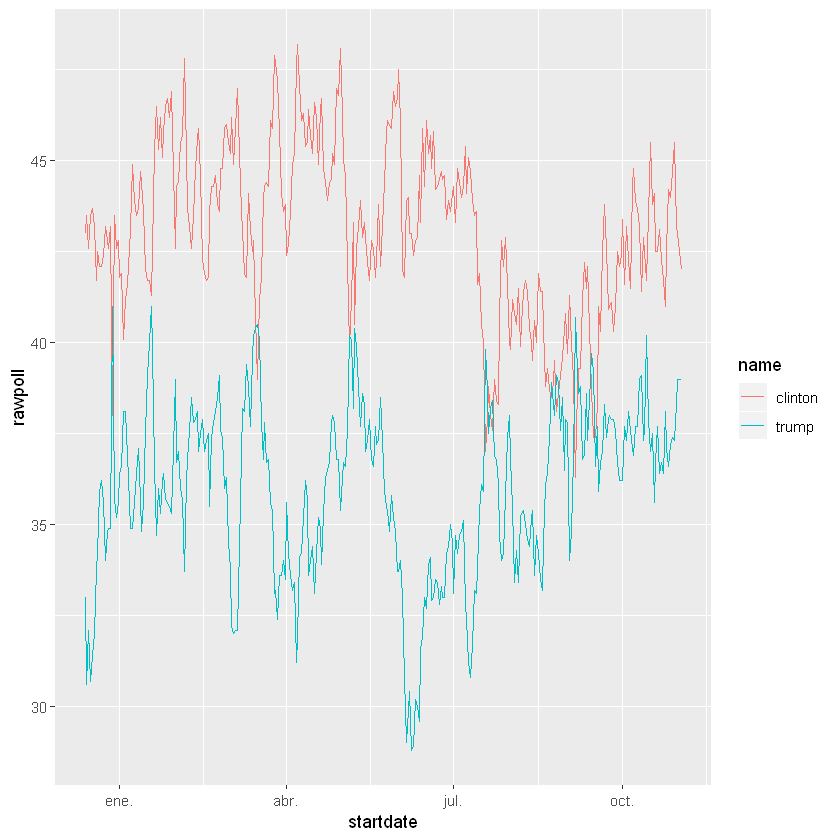

In [6]:
ggplot(polls_both,aes(startdate, rawpoll,color=name)) +geom_line()

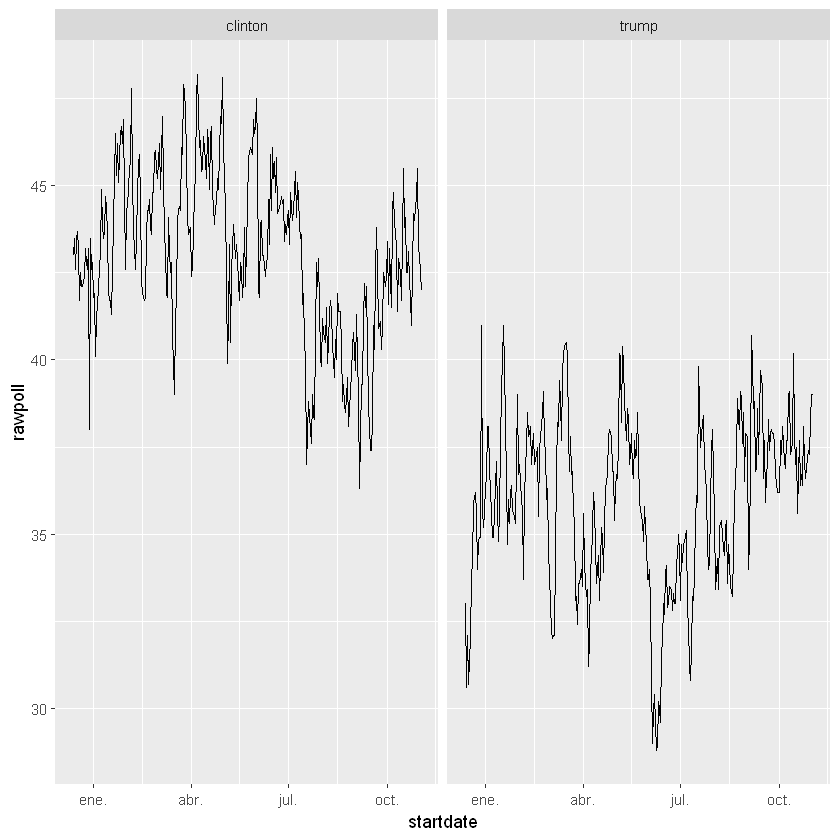

In [7]:
ggplot(data = polls_both, mapping = aes(startdate, rawpoll)) +
  geom_line() +
  facet_wrap(~ name)

### Convirtiendo a Series

In [42]:
kingstimeseries <- ts(kings)
birthstimeseries <- ts(births, frequency=12, start=c(1946,1))
souvenirtimeseries <- ts(souvenir, frequency=12, start=c(1987,1))

In [9]:
polls_clinton_ts=ts(polls_both$rawpoll[which(polls_both$name == "clinton")],frequency = 1,start = 1)
polls_trump_ts=ts(polls_both$rawpoll[which(polls_both$name == "trump")],frequency = 1,start = 1)

### Graficando las series

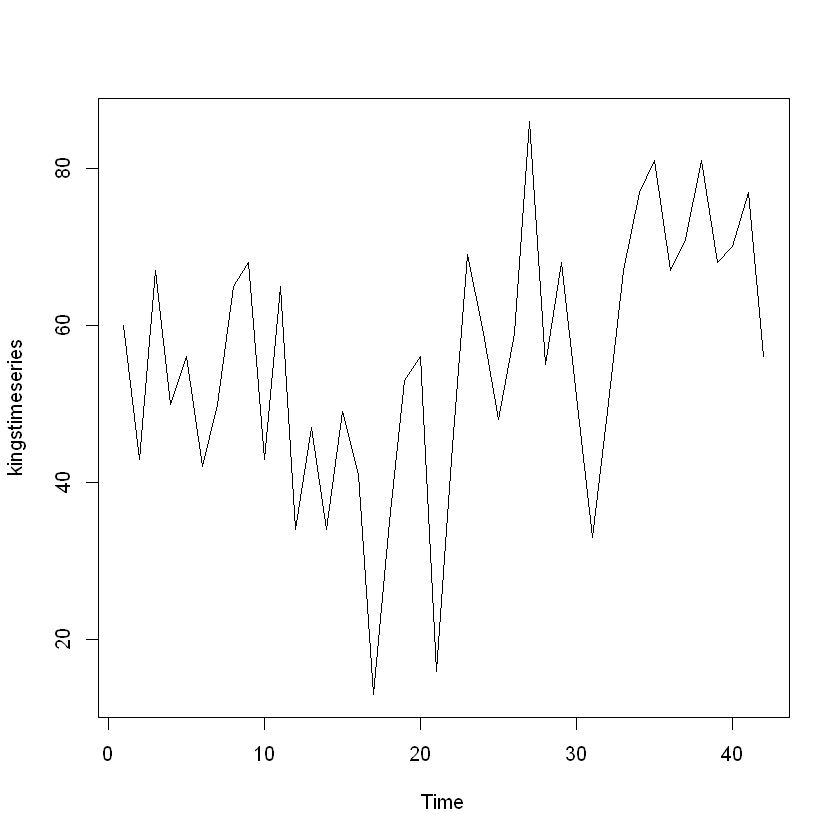

In [10]:
ts.plot(kingstimeseries)

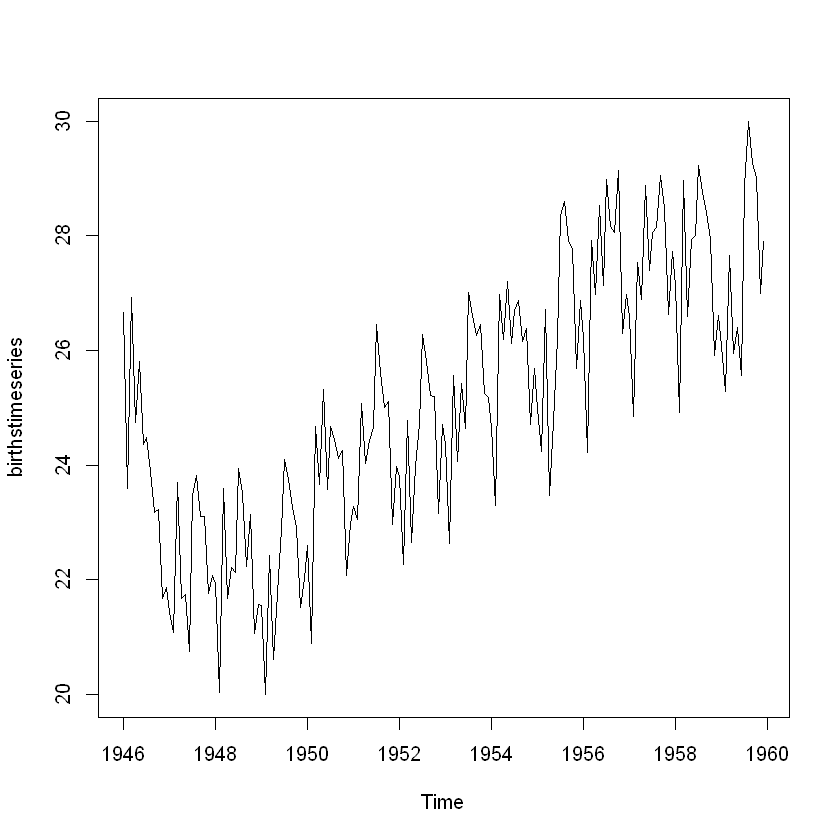

In [11]:
ts.plot(birthstimeseries)

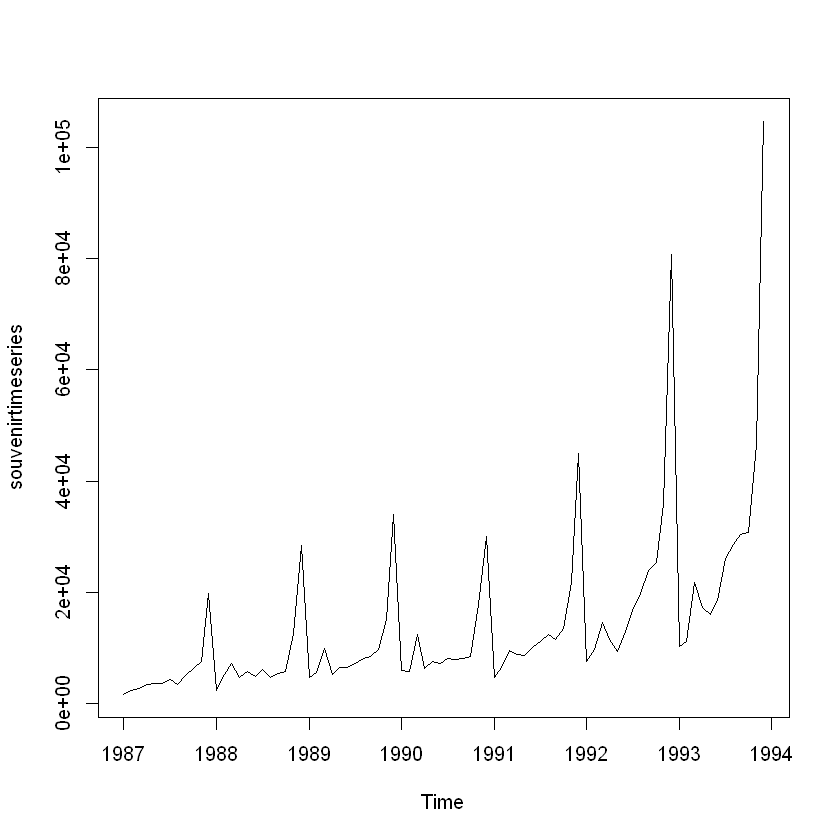

In [12]:
ts.plot(souvenirtimeseries)

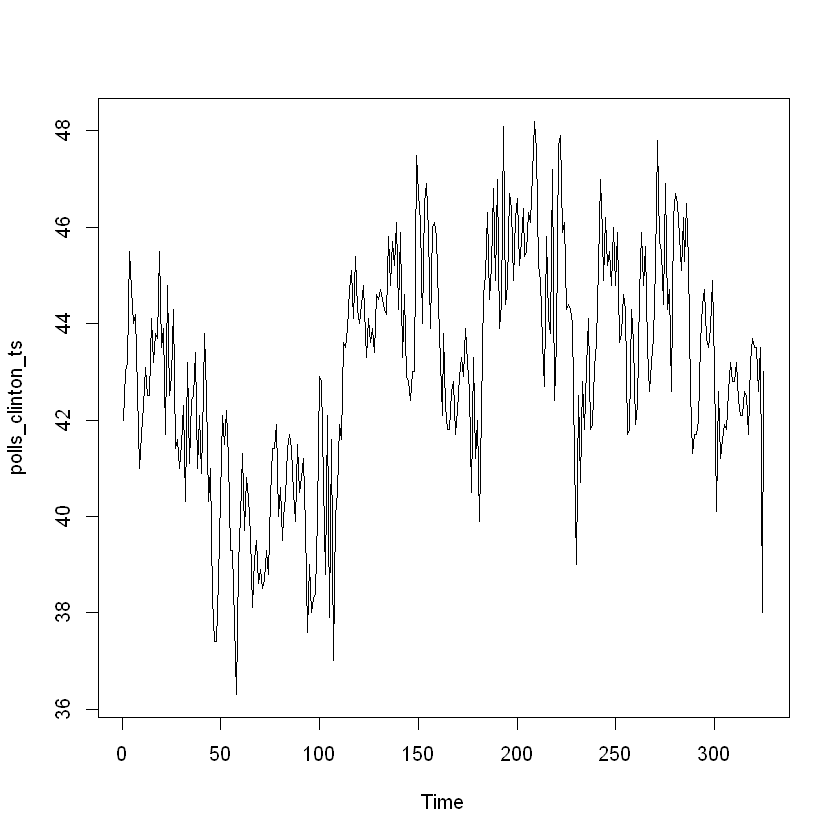

In [13]:
ts.plot(polls_clinton_ts)

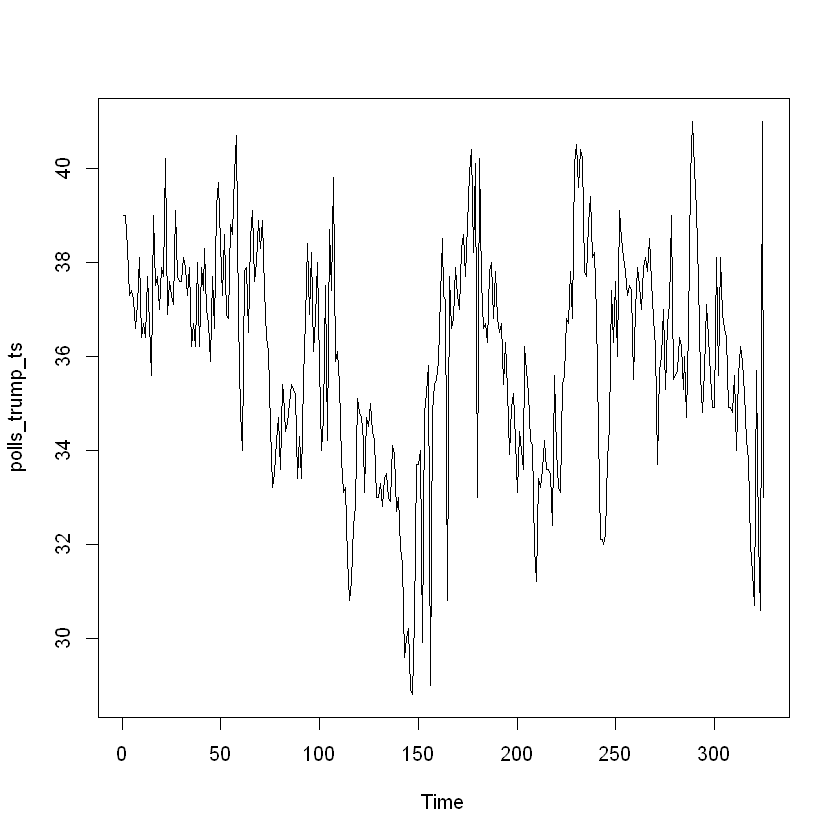

In [14]:
ts.plot(polls_trump_ts)

### Series no estacionales

**Suavizando la curva KINGS con SMA**

In [15]:
library(TTR)

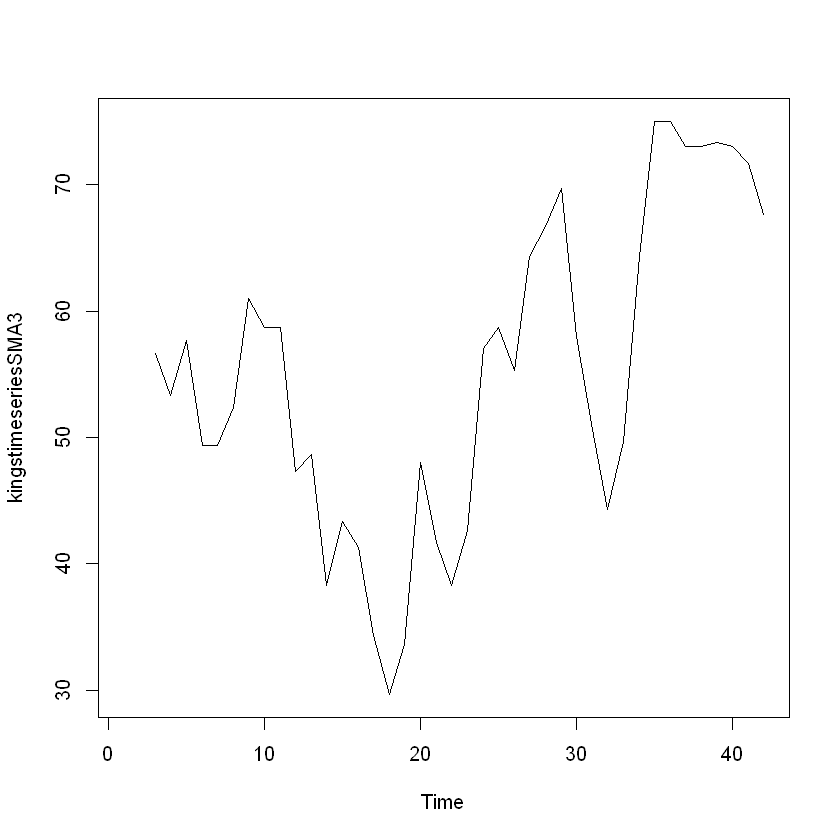

In [16]:
kingstimeseriesSMA3 <- SMA(kingstimeseries,n = 3)
plot.ts(kingstimeseriesSMA3)

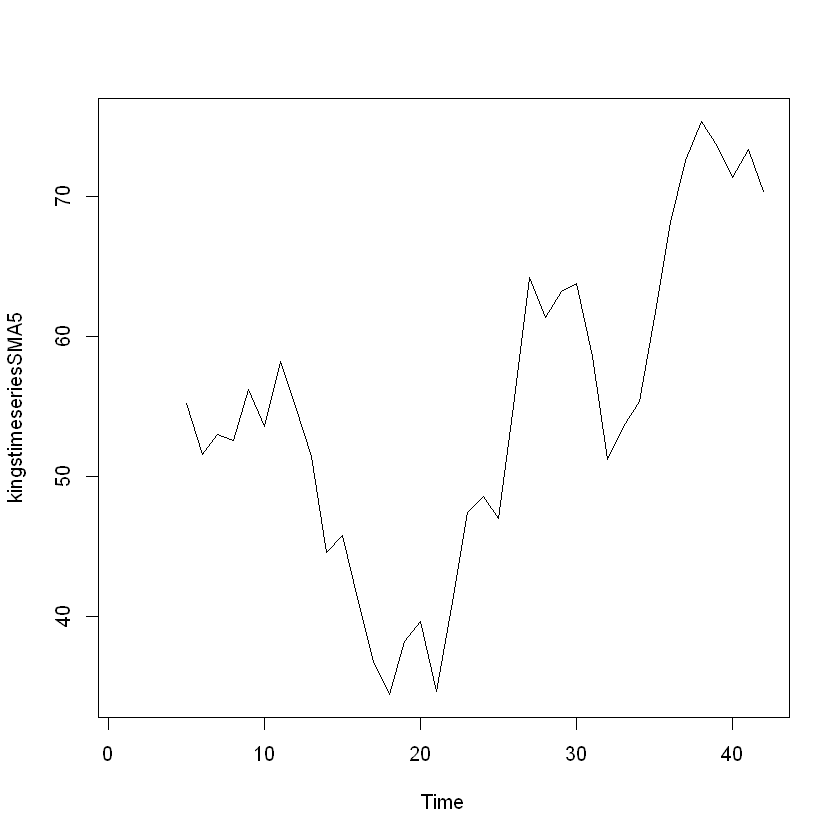

In [17]:
kingstimeseriesSMA5 <- SMA(kingstimeseries,n = 5)
plot.ts(kingstimeseriesSMA5)

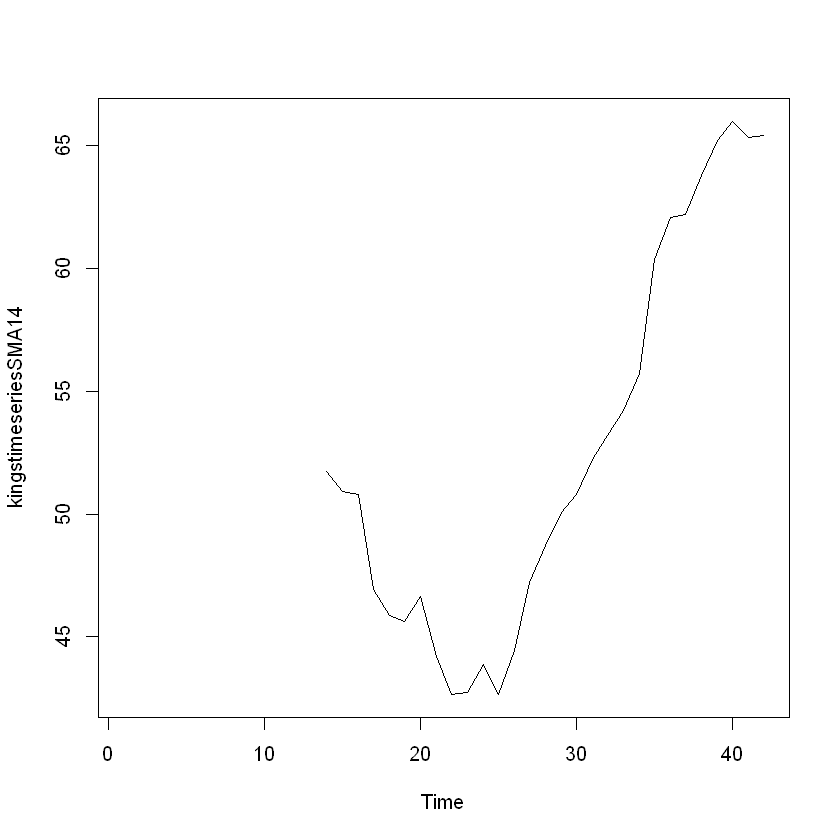

In [18]:
kingstimeseriesSMA14 <- SMA(kingstimeseries,n = 14)
plot.ts(kingstimeseriesSMA14)

tener cuidado del numero de puntos que quitamos en la serie cuando aplicamos SMA ya que podemos perder informacion valiosa

**Suavizando la curva CLINTON con SMA**

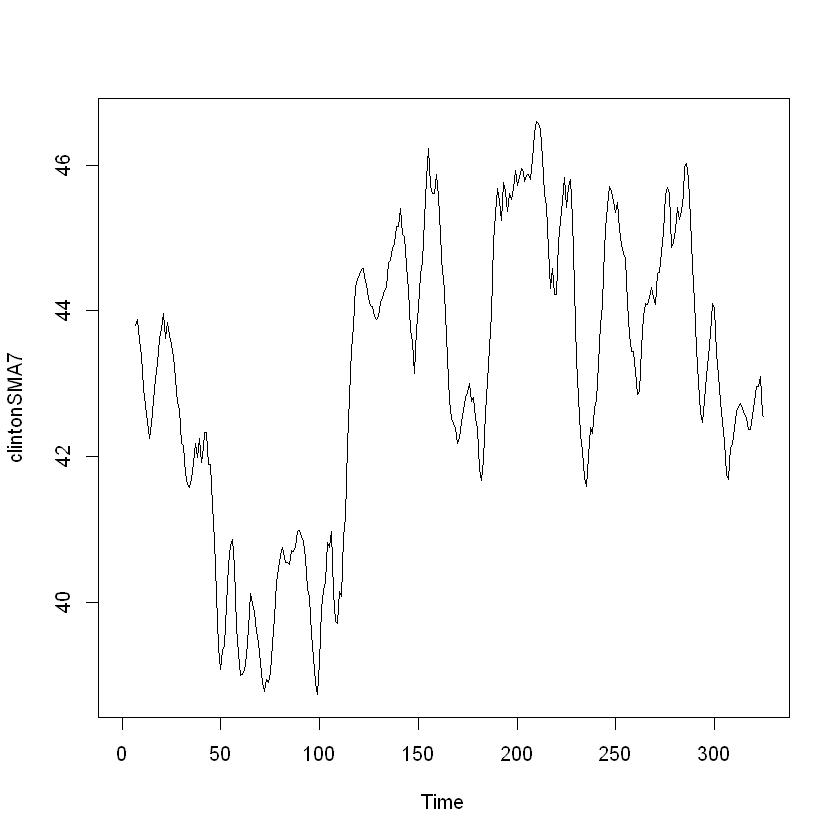

In [19]:
clintonSMA7 <- SMA(polls_clinton_ts,n=7)
plot.ts(clintonSMA7)

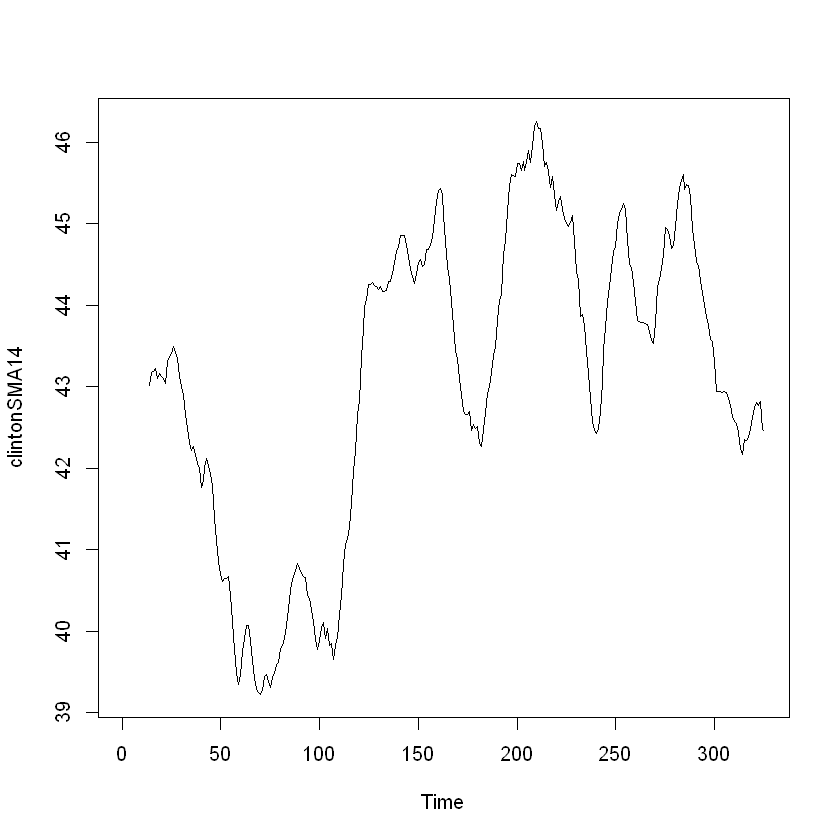

In [20]:
clintonSMA14 <- SMA(polls_clinton_ts,n=14)
plot.ts(clintonSMA14)

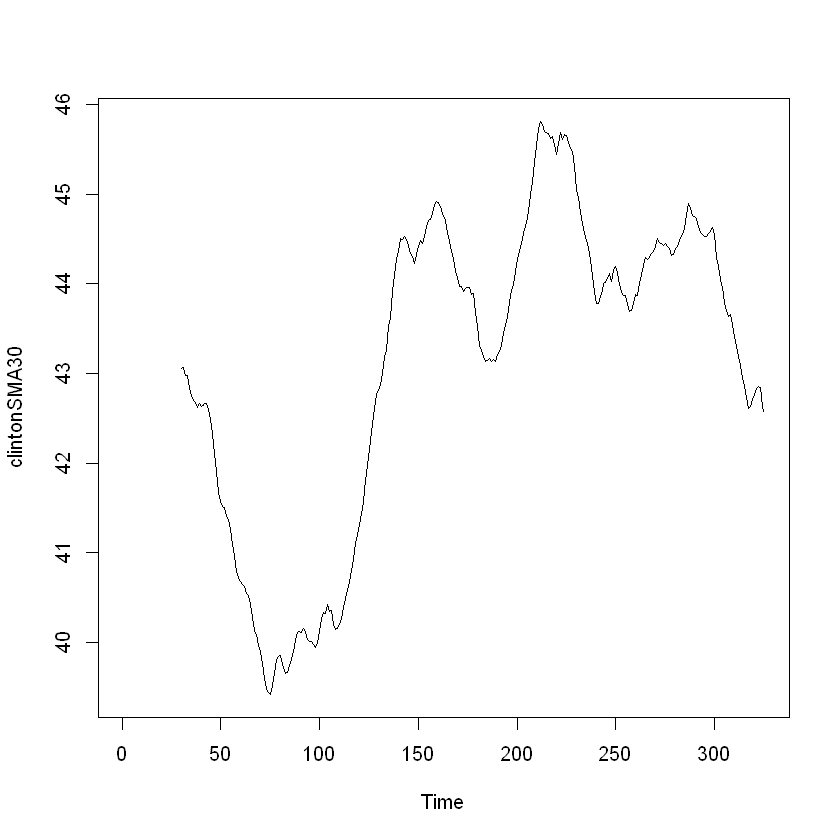

In [21]:
clintonSMA30 <- SMA(polls_clinton_ts,n=30)
plot.ts(clintonSMA30)

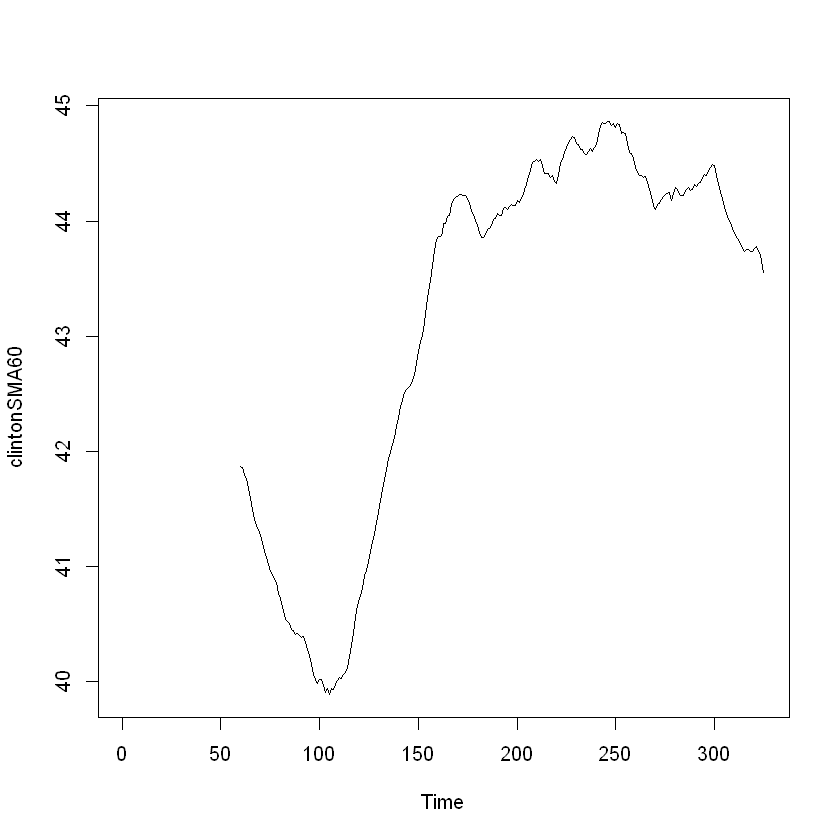

In [22]:
clintonSMA60 <- SMA(polls_clinton_ts,n=60)
plot.ts(clintonSMA60)

**Suavizando la curva TRUMP con SMA**

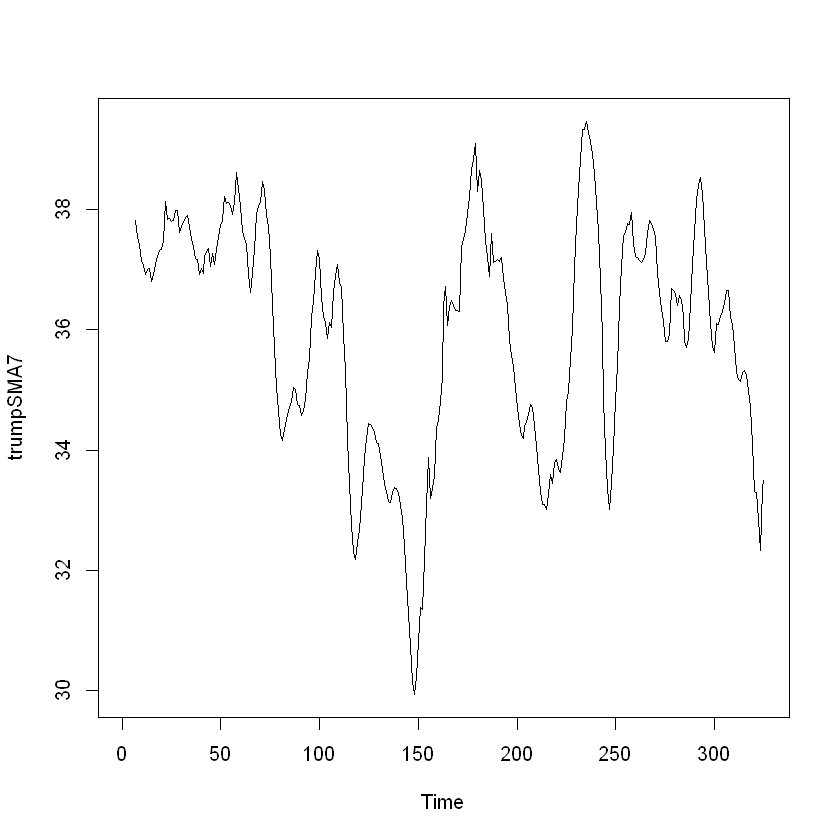

In [23]:
trumpSMA7 <- SMA(polls_trump_ts,n=7)
plot.ts(trumpSMA7)

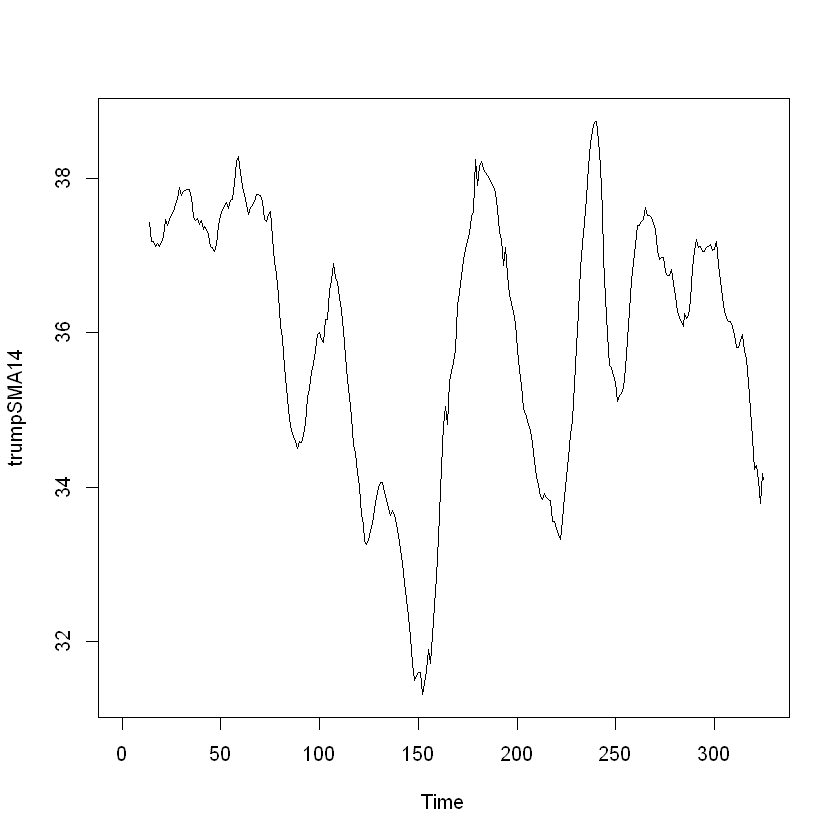

In [24]:
trumpSMA14 <- SMA(polls_trump_ts,n=14)
plot.ts(trumpSMA14)

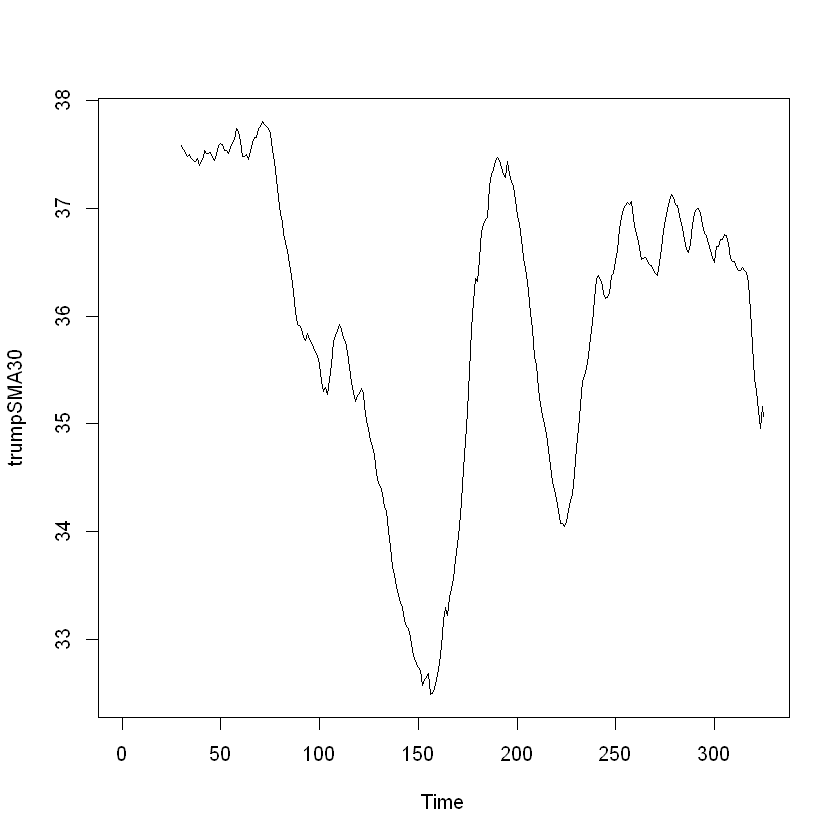

In [25]:
trumpSMA30 <- SMA(polls_trump_ts,n=30)
plot.ts(trumpSMA30)

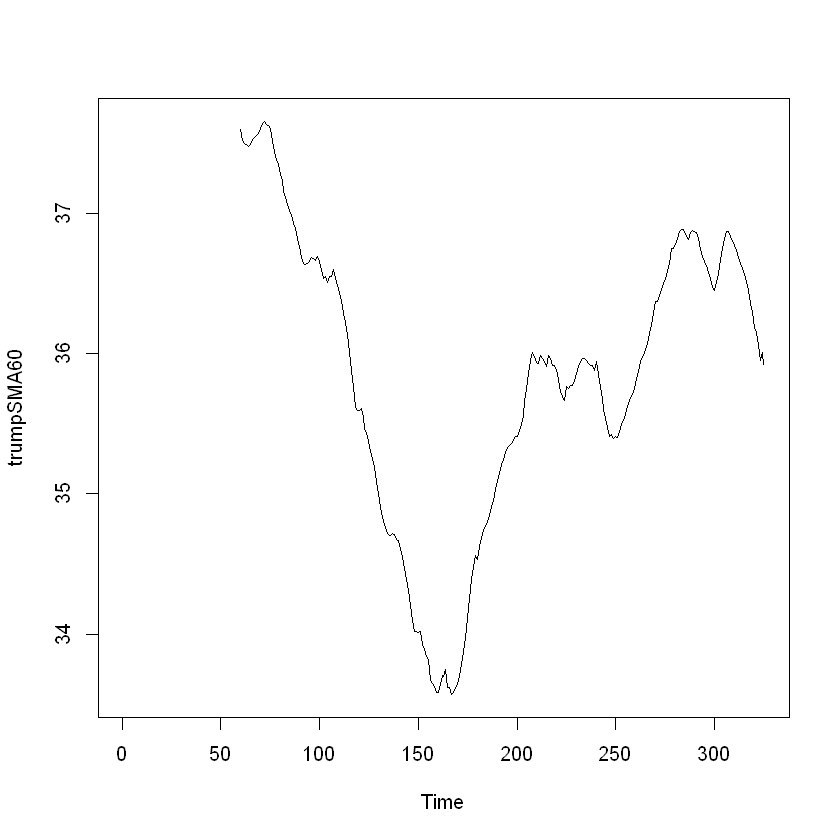

In [26]:
trumpSMA60 <- SMA(polls_trump_ts,n=60)
plot.ts(trumpSMA60)

**Graficando ambas curvas CLINTON y TRUMP por cada SMA**

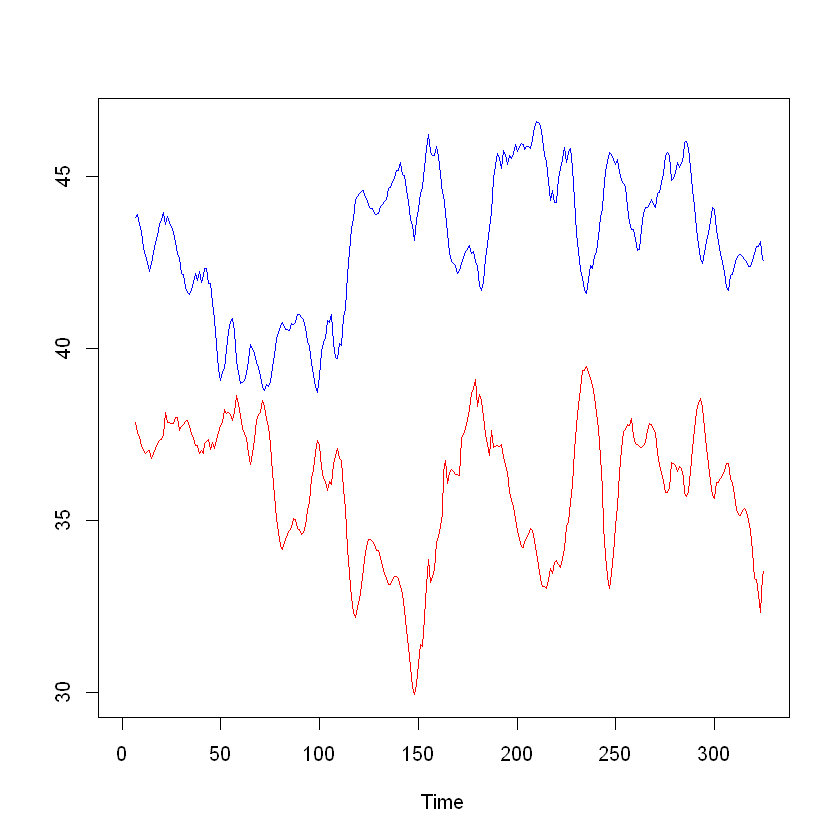

In [27]:
ts.plot(trumpSMA7,clintonSMA7,gpars = list(col = c("red", "blue")))

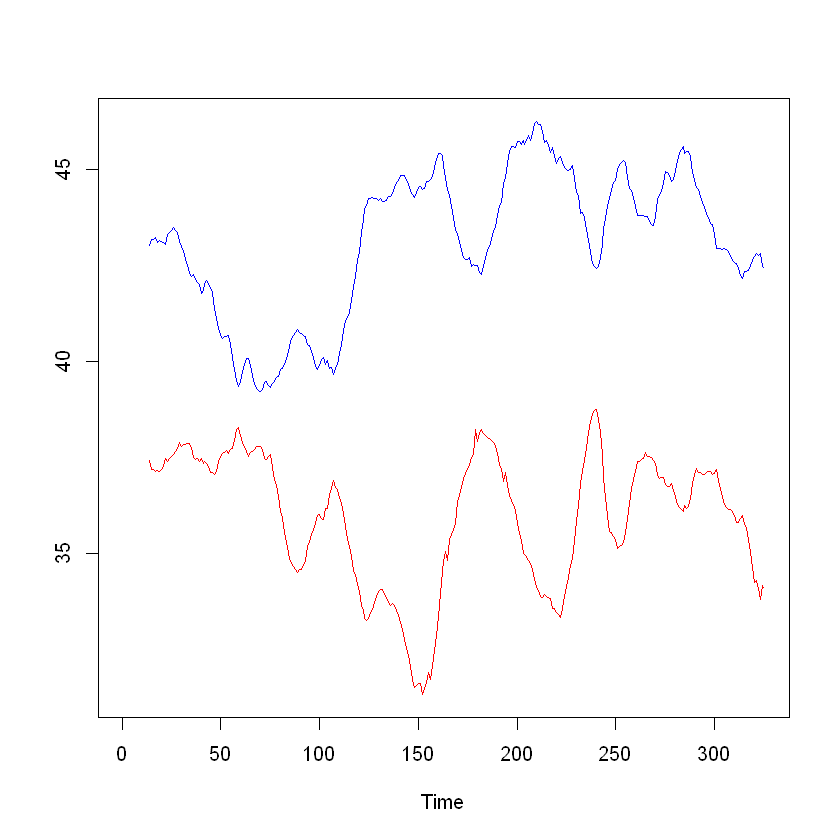

In [28]:
ts.plot(trumpSMA14,clintonSMA14,gpars = list(col = c("red", "blue")))

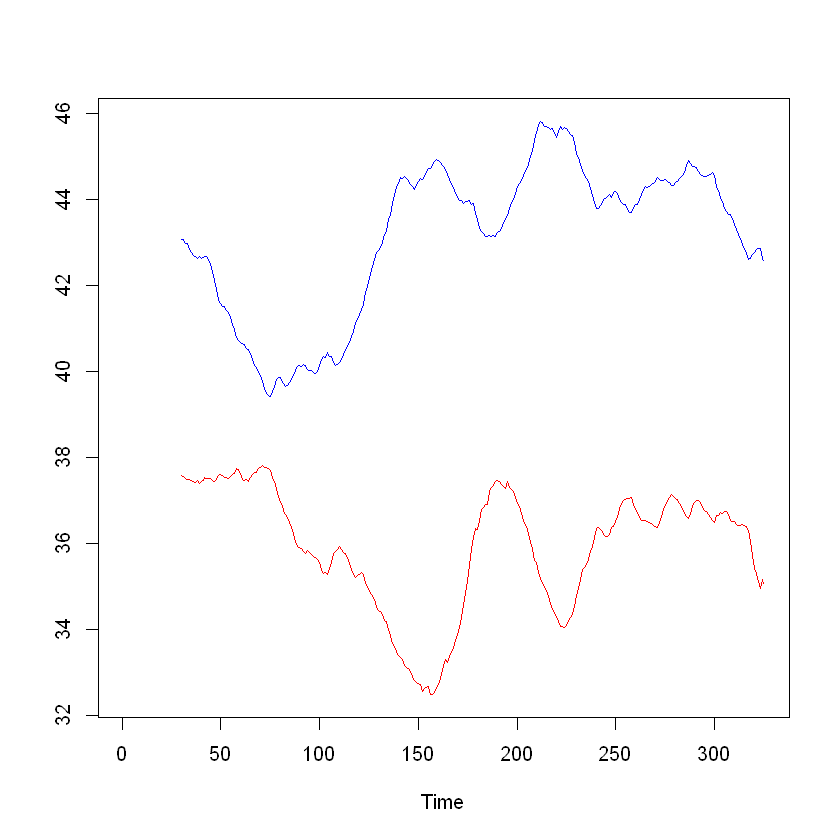

In [29]:
ts.plot(trumpSMA30,clintonSMA30,gpars = list(col = c("red", "blue")))

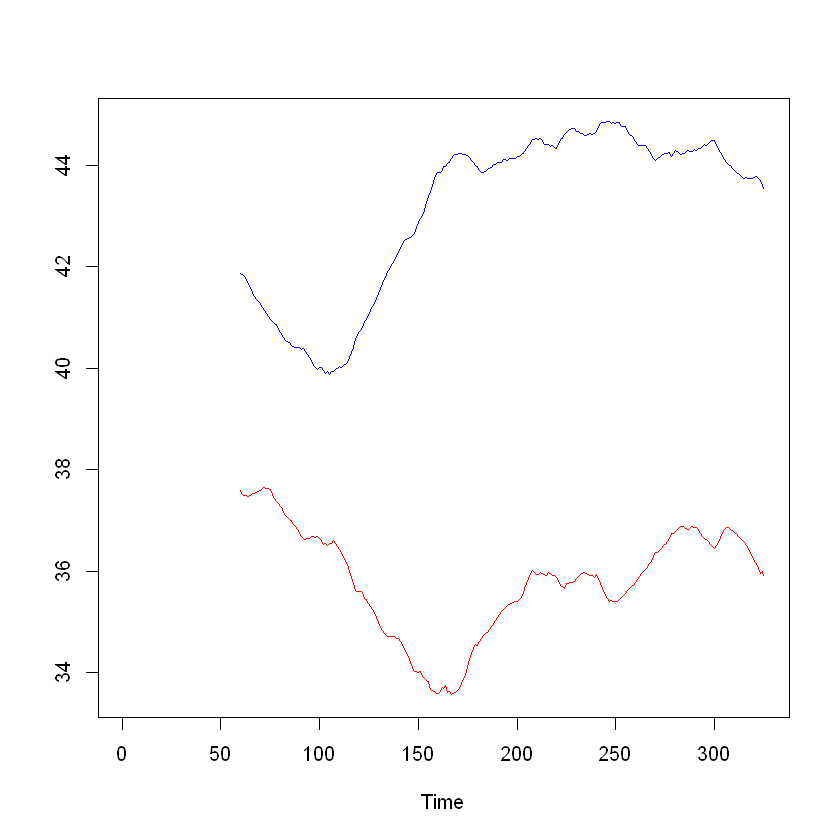

In [30]:
ts.plot(trumpSMA60,clintonSMA60,gpars = list(col = c("red", "blue")))

### Series estacionales

**Descomponiendo las series - OPCION_1**

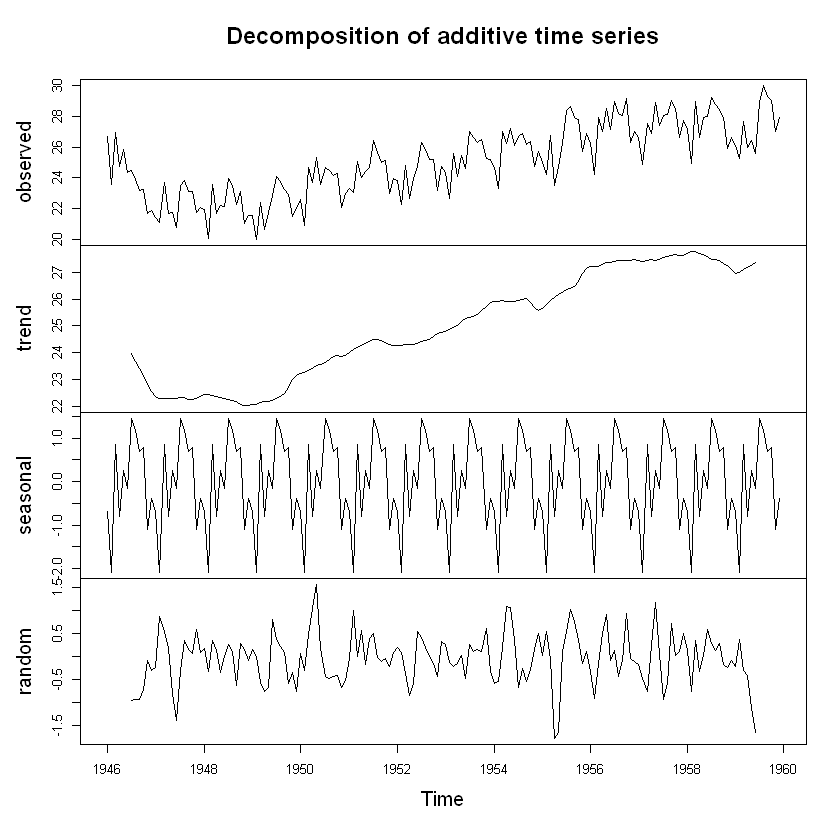

In [31]:
birthstimeseriescomponents <- decompose(birthstimeseries)
plot(birthstimeseriescomponents)

**Descomponiendo las series - OPCION_2**

In [38]:
library(fpp2)

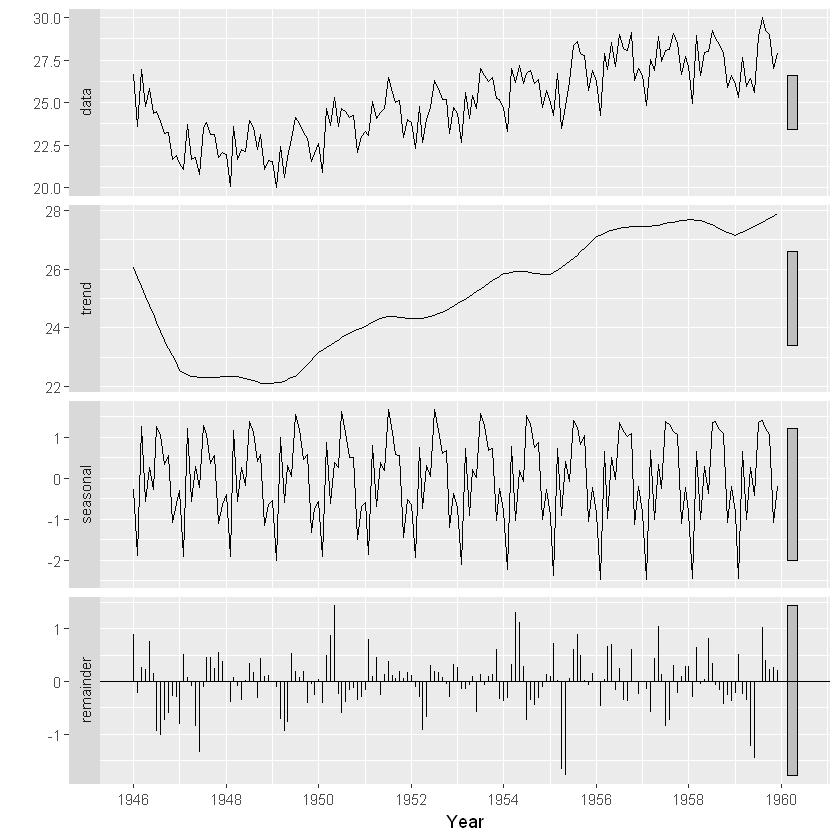

In [46]:
fit <- stl(birthstimeseries[,1],s.window=7)
autoplot(fit)+xlab("Year")

- El ajuste de tendencia con stl() utiliza la funcion loes() que trabaja en rectas lineales en grupos de puntos de la serie cogiendo puntos medios de estos grupos.

- la funccion stl() solo es valido para series aditivas, pero es la mas optima
- la funcion stlf() adicional le quita la componente estacional

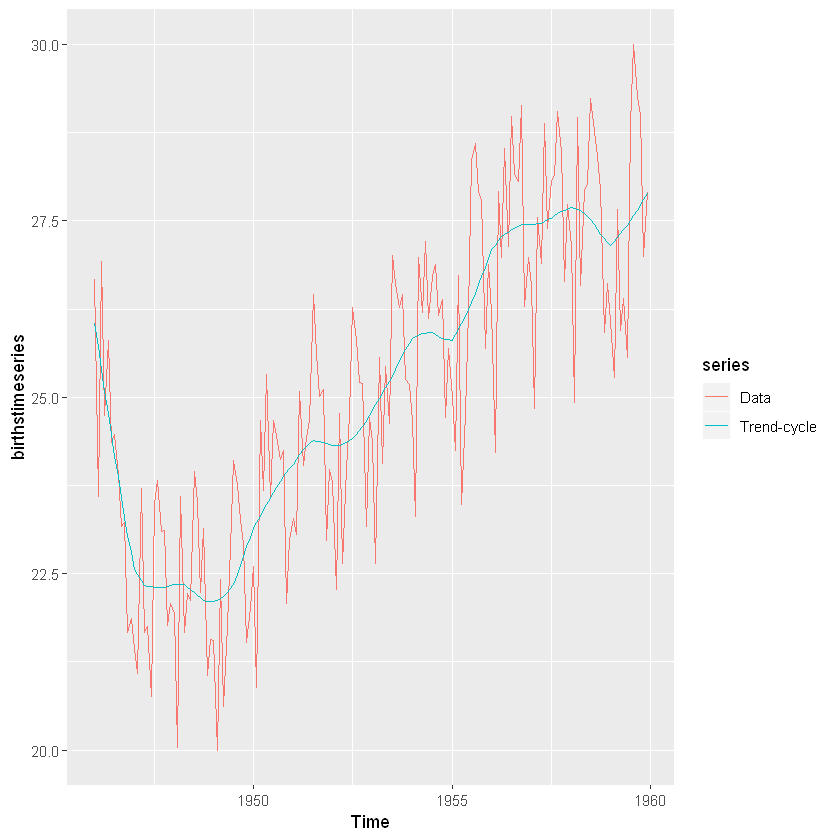

In [47]:
autoplot(birthstimeseries, series="Data") +
  autolayer(trendcycle(fit), series="Trend-cycle")

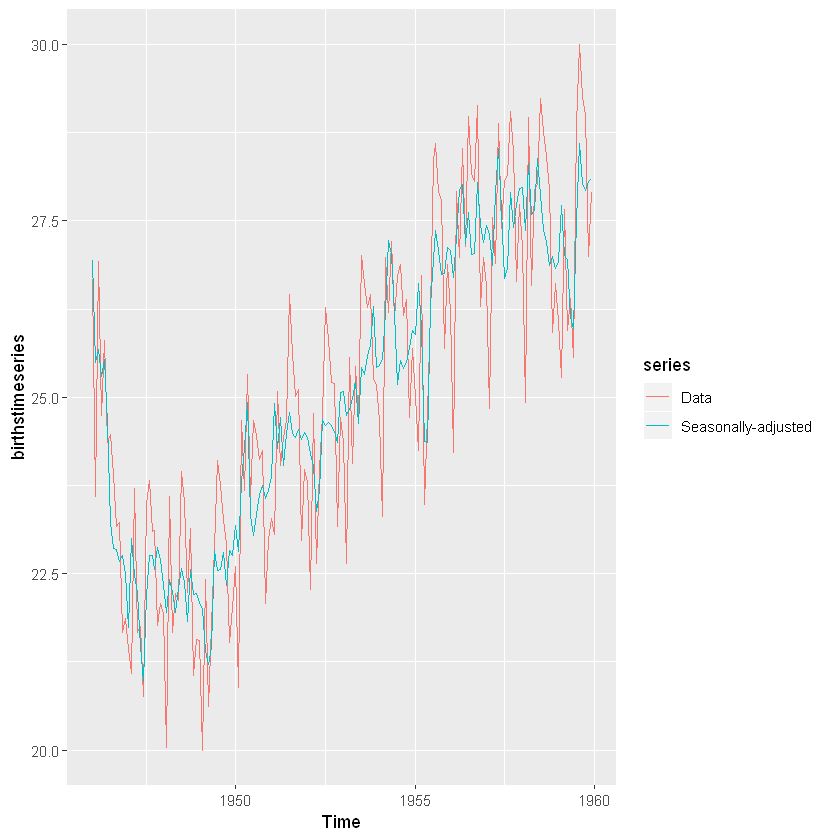

In [48]:
autoplot(birthstimeseries, series="Data") +
  autolayer(seasadj(fit), series="Seasonally-adjusted")

**Descomponiendo las series - OPCION_3**

In [50]:
souvenirtimeserieslog <- log(souvenirtimeseries)

cuando se tiene una serie estacional multiplicativa se puede transformar la serie con log() para hacer constante la varianza

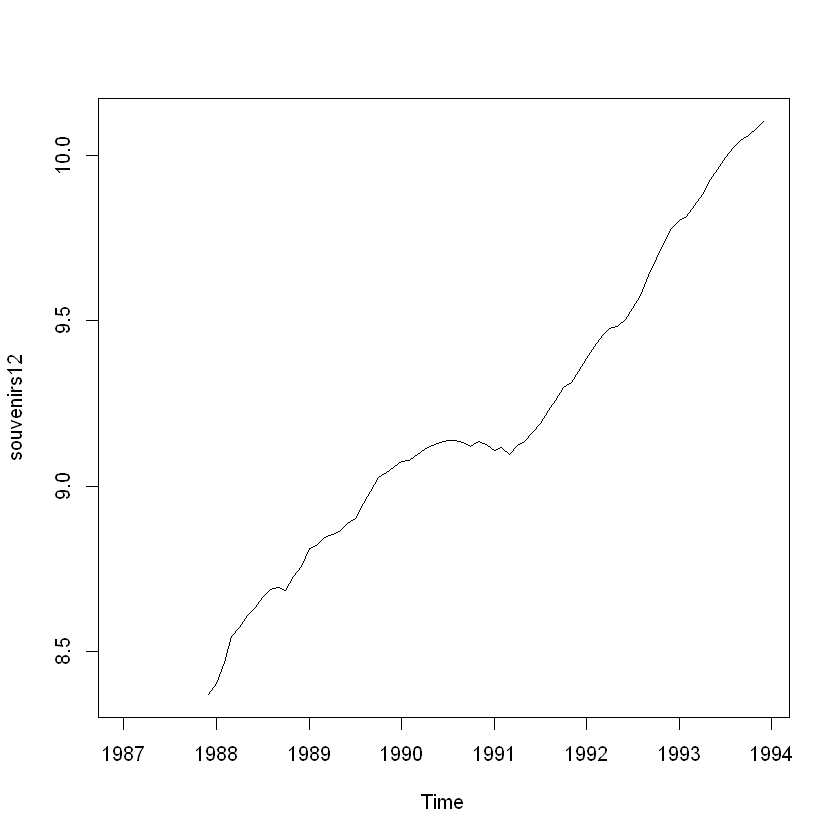

In [52]:
souvenirs12 <- SMA(souvenirtimeserieslog,n=12)
plot.ts(souvenirs12)

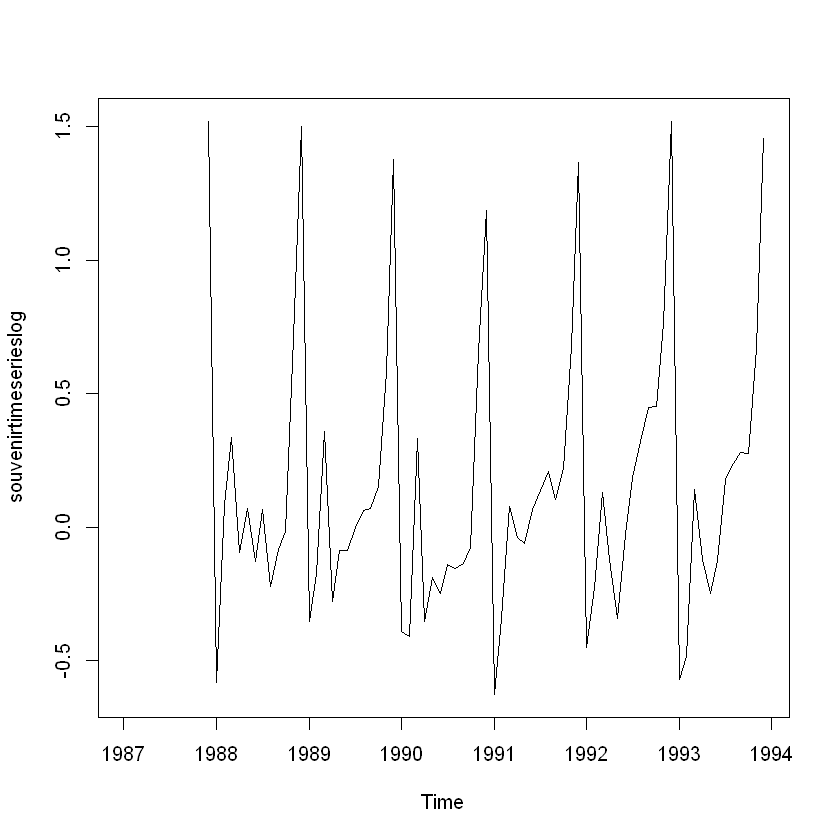

In [53]:
souvenirs12.detrend=souvenirtimeserieslog-souvenirs12
plot.ts(souvenirs12.detrend)

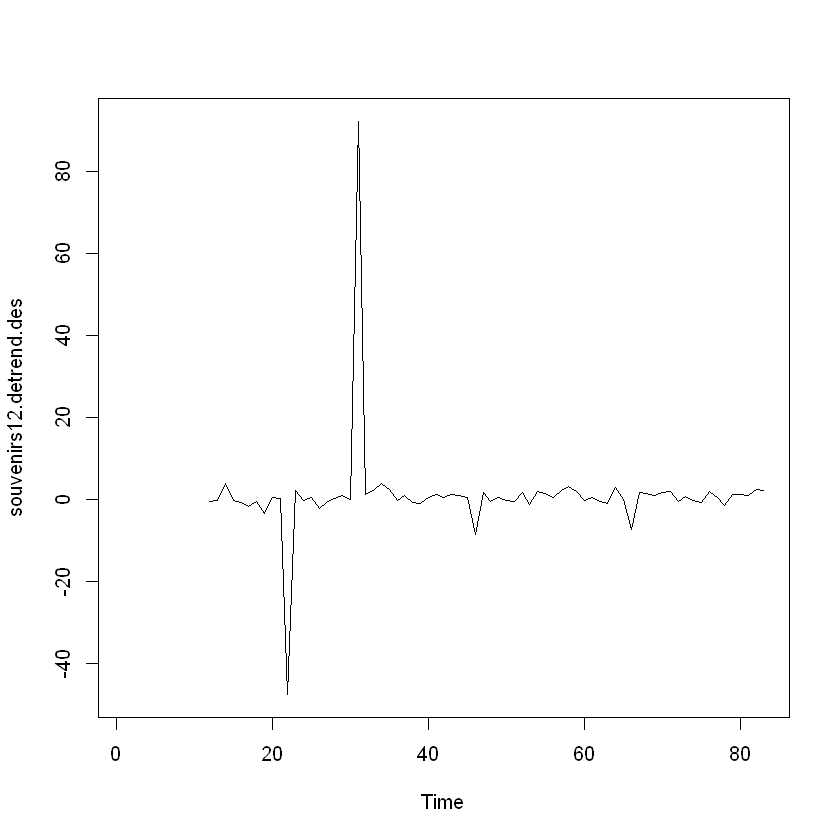

In [54]:
souvenirs12.detrend.des=souvenirs12.detrend[2:84]/souvenirs12.detrend[1:83]
plot.ts(souvenirs12.detrend.des)

Con la funcion log() para hacer constante la varianza presente en la serie, aplicamos SMA para suavizar la serie, restamos la serie con funcion log de la serie suavizada con SMA para quitarle la tendencia, y por ultimo dividimos cada punto de la serie por su punto anterior para quitarle estacionalidad

**Tambien se puede usar la funcion seasadj() para quitar la componente estacional**

In [56]:
library(seasonal)

Warning message:
"package 'seasonal' was built under R version 3.5.2"

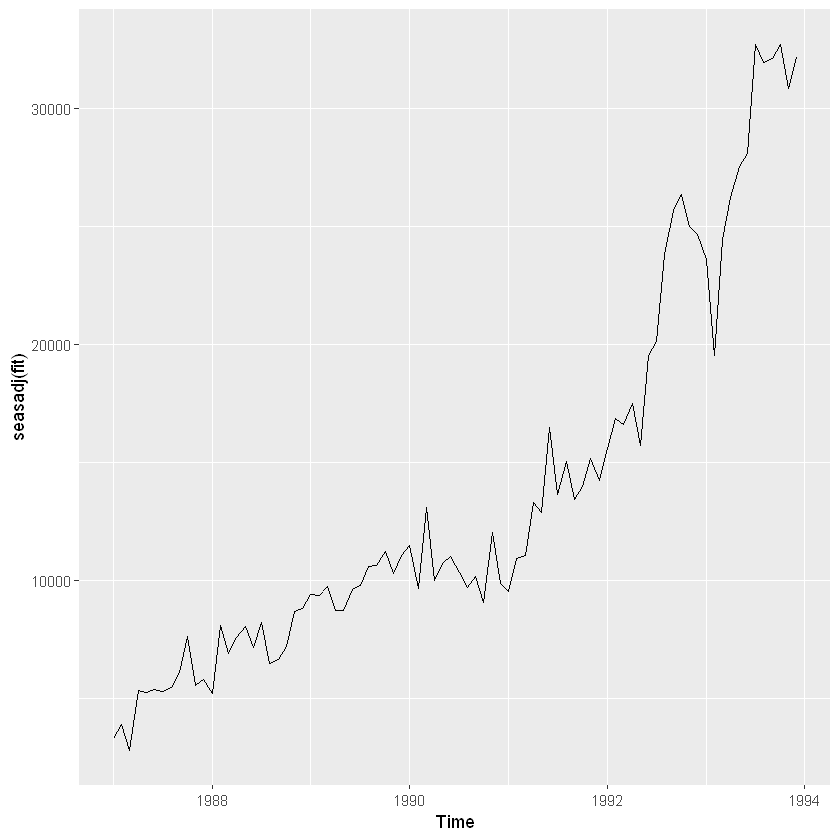

In [58]:
fit <- seas(souvenirtimeseries, x11="")
autoplot(seasadj(fit))

Se quita la estacionalidad con esta funcion solo en la estacionalidad presente en tiempos cortos

**Otras formas de quitar tendencia y estacionalidad**

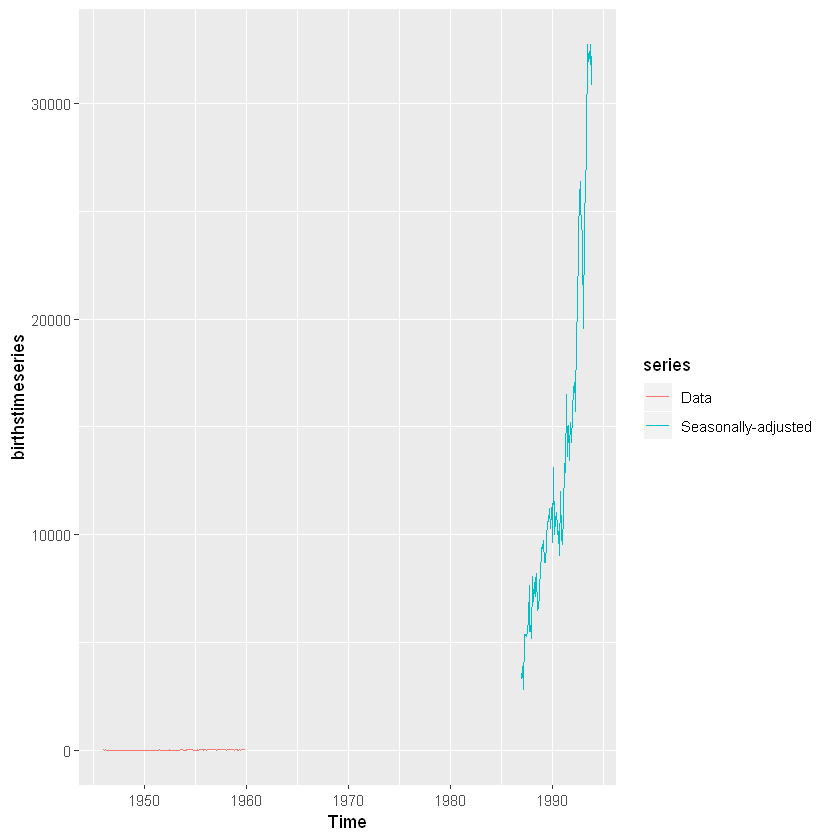

In [59]:
# ajuste seasonal
autoplot(birthstimeseries, series="Data") +
  autolayer(seasadj(fit), series="Seasonally-adjusted")

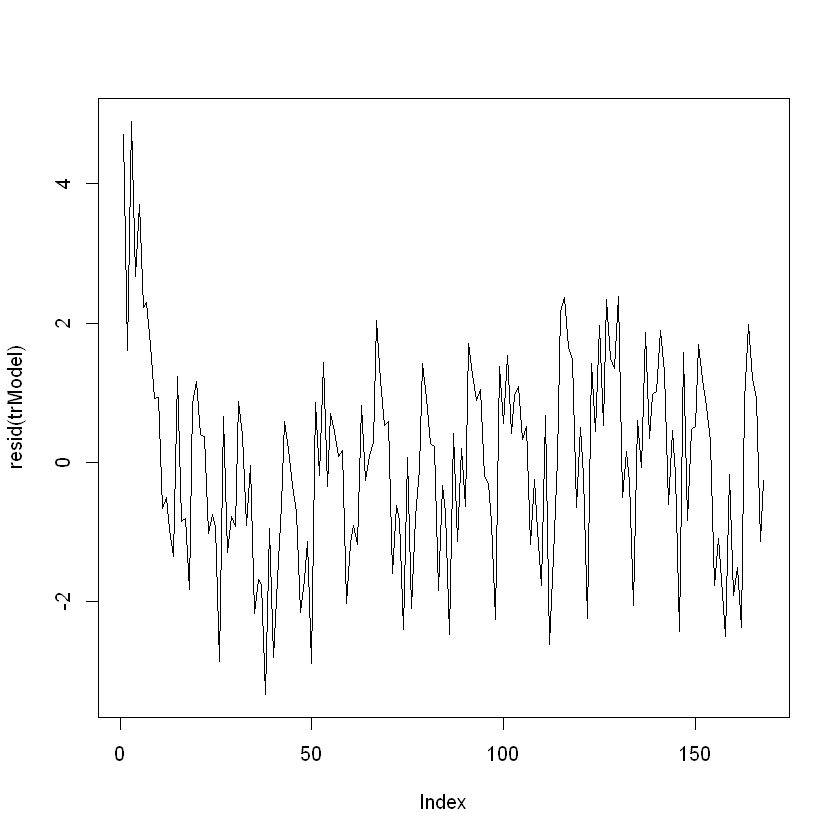

In [60]:
#ajuste tendencia
trModel=lm(birthstimeseries~seq(1,length(birthstimeseries)))
plot(resid(trModel), type="l")

Quitamos la tendencia utilizando la funcion lm() recta lineal

## Autocorrelacion

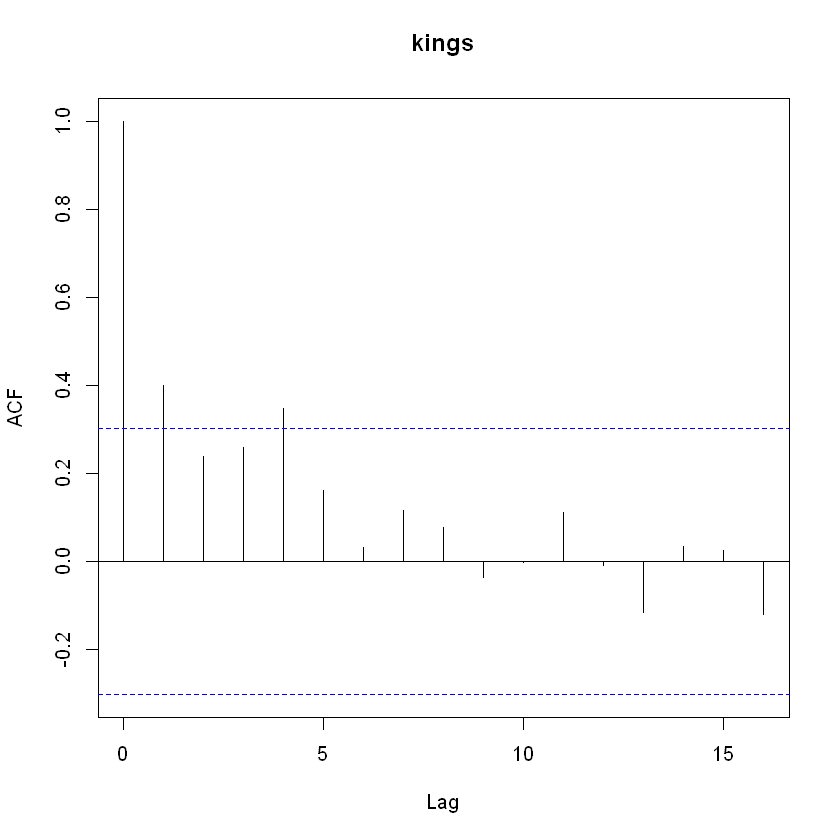

In [61]:
acfkings<- acf(kingstimeseries) # autocorrelation

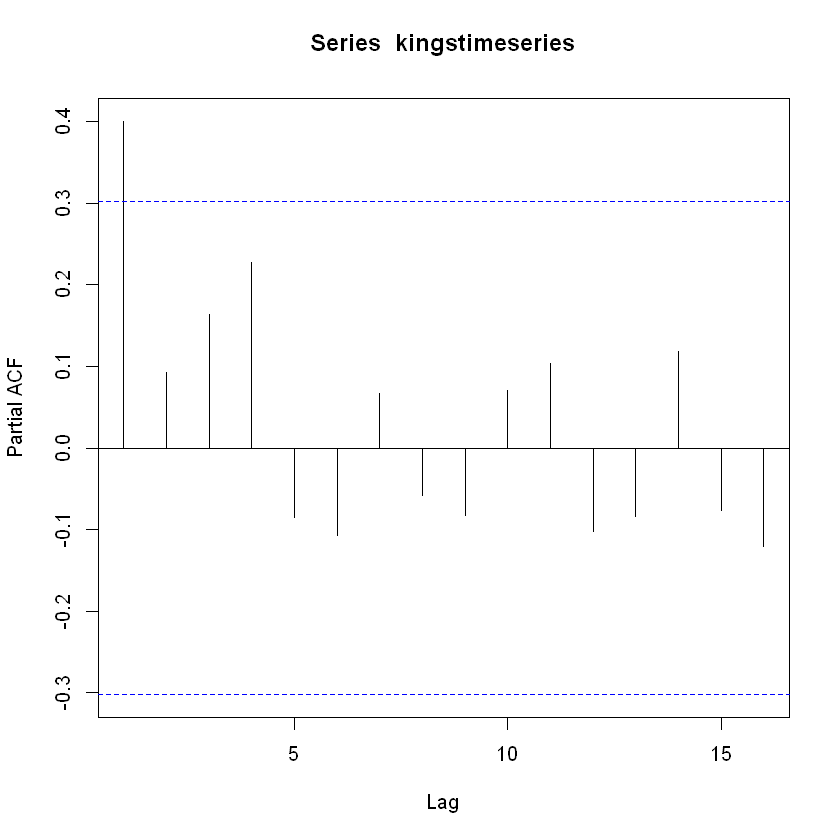

In [62]:
pacfRes <- pacf(kingstimeseries)

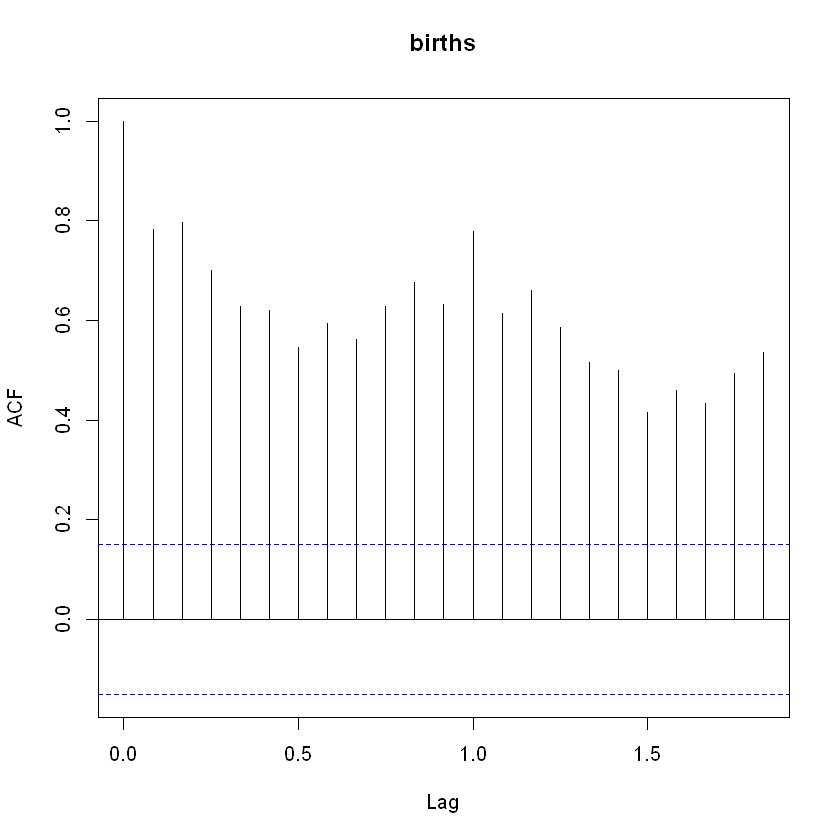

In [63]:
acfbirth<- acf(birthstimeseries) # autocorrelation

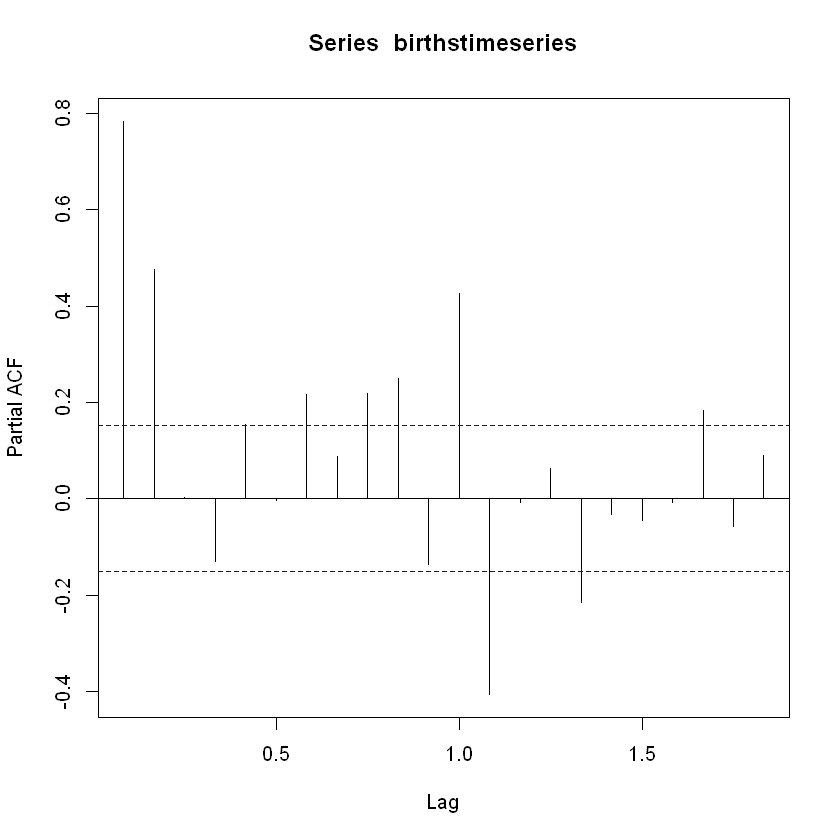

In [64]:
pacfbirth <- pacf(birthstimeseries)

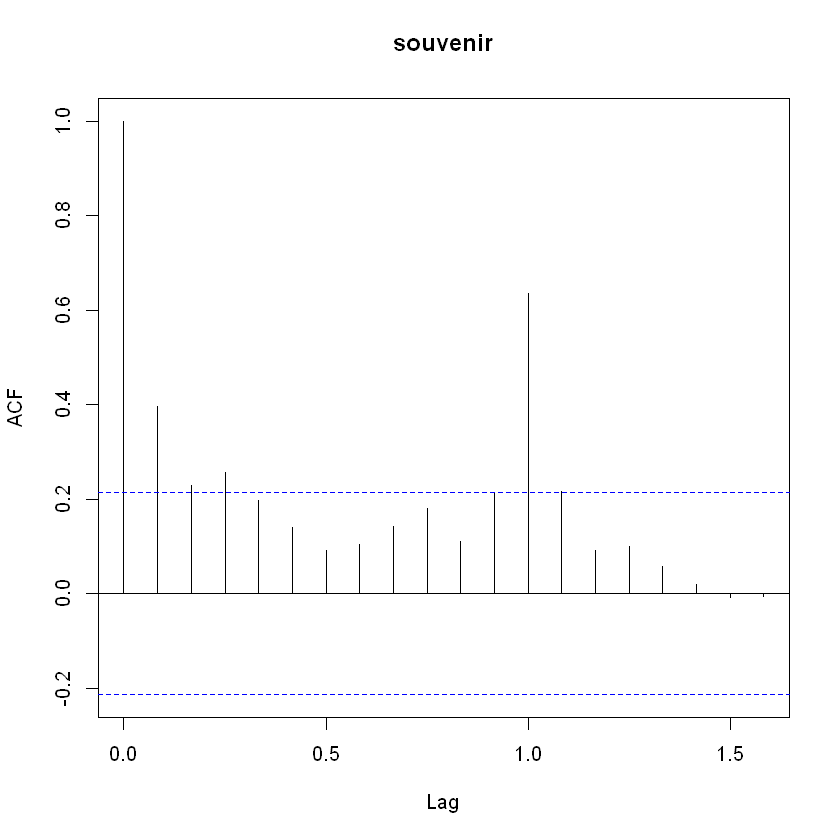

In [65]:
acfsouvenir<- acf(souvenirtimeseries) # autocorrelation

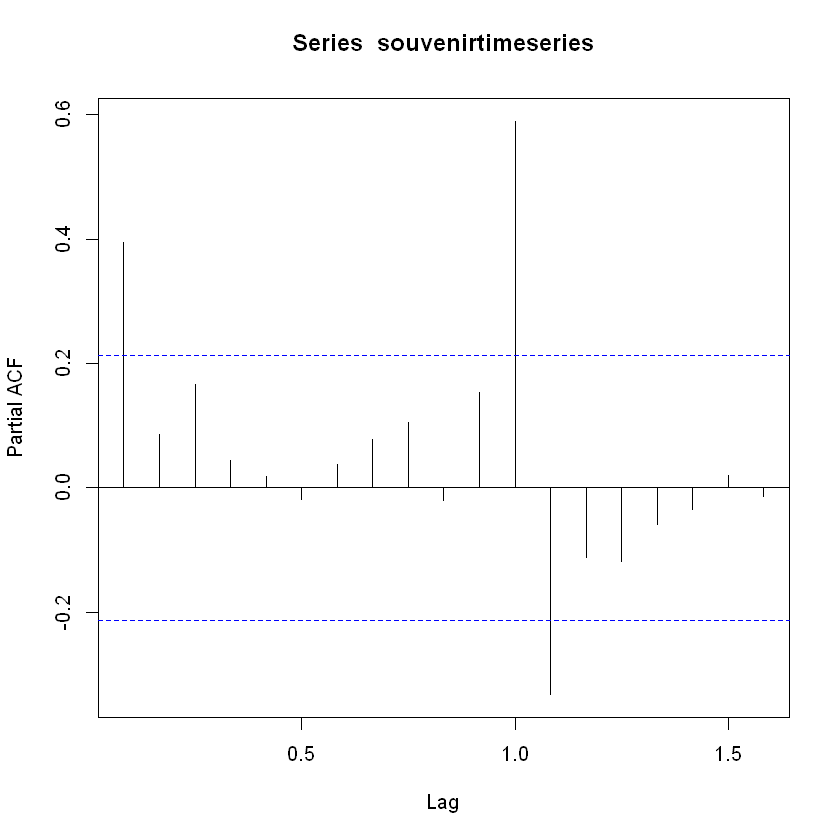

In [66]:
pacfsouvenir <- pacf(souvenirtimeseries)

Autocorrelacion: cuanta relacion tiene cada punto con el anterior o un grupo de puntos con el grupo de puntos anterior

- cuando el grafico de correlacion entre los lacks es alta la serie no es estacionaria
- cuando el grafico de correlacion entre los lacks es minima la serie es estacionaria

## Prediccion de Series

Estimacion por medias

In [68]:
meanf(kingstimeseries,5)

   Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
43       55.28571 33.44771 77.12372 21.42677 89.14466
44       55.28571 33.44771 77.12372 21.42677 89.14466
45       55.28571 33.44771 77.12372 21.42677 89.14466
46       55.28571 33.44771 77.12372 21.42677 89.14466
47       55.28571 33.44771 77.12372 21.42677 89.14466

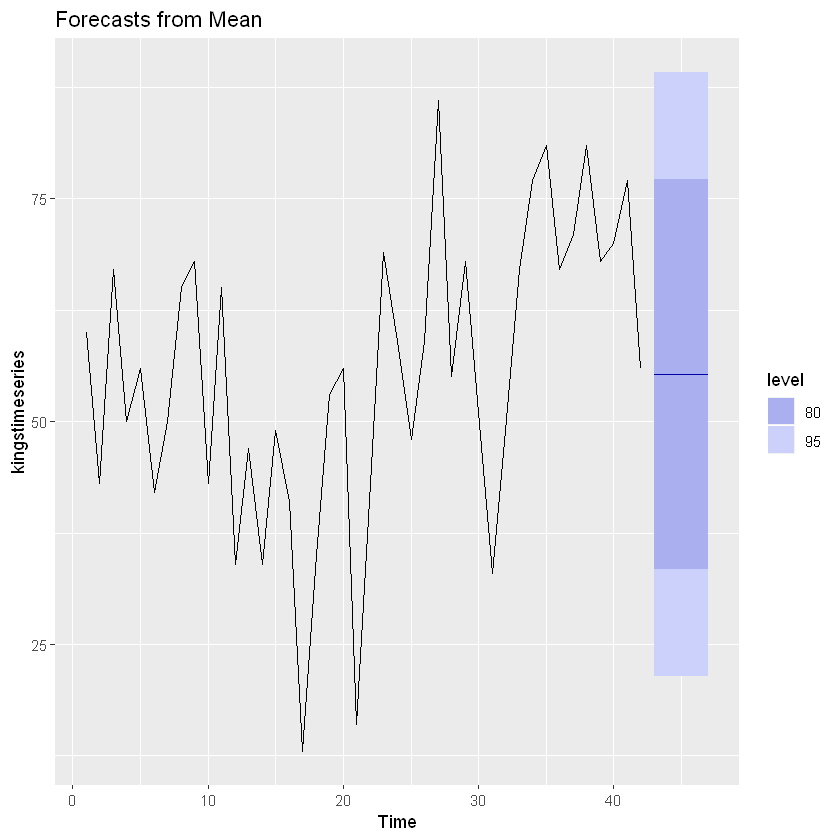

In [69]:
autoplot(meanf(kingstimeseries,5))

Estimacion por naive

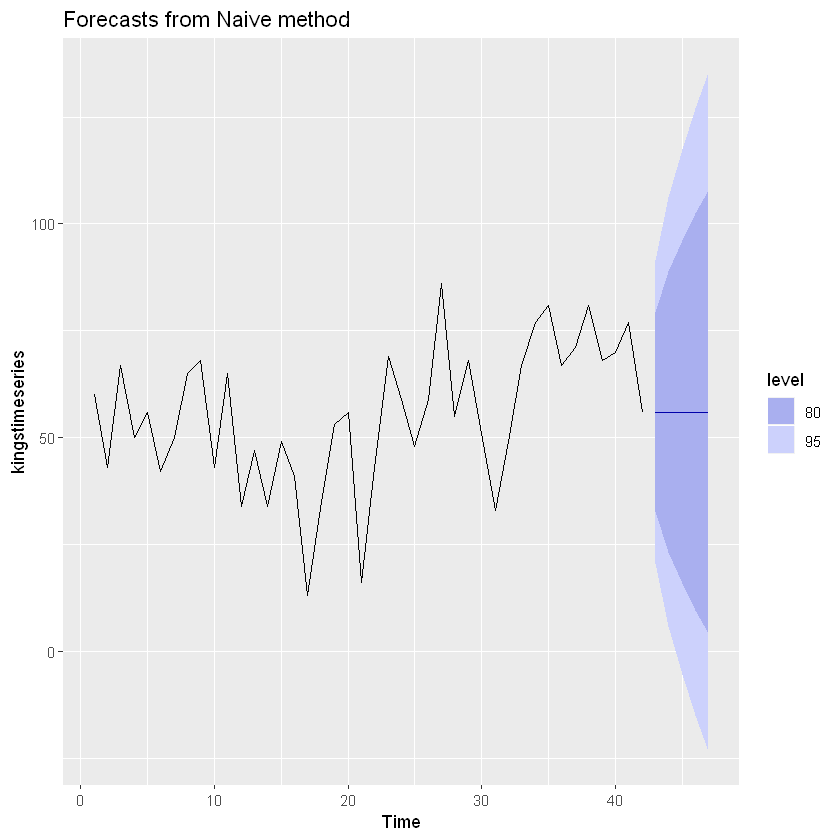

In [70]:
autoplot(naive(kingstimeseries, 5))

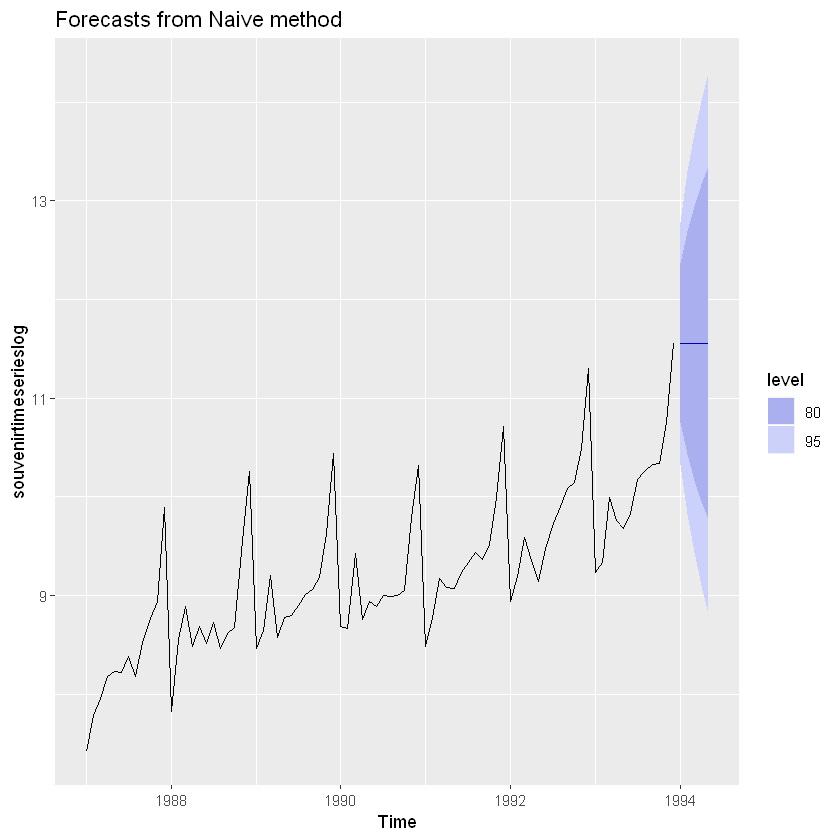

In [71]:
autoplot(naive(souvenirtimeserieslog,5))

Estimacion Seasonal Naive

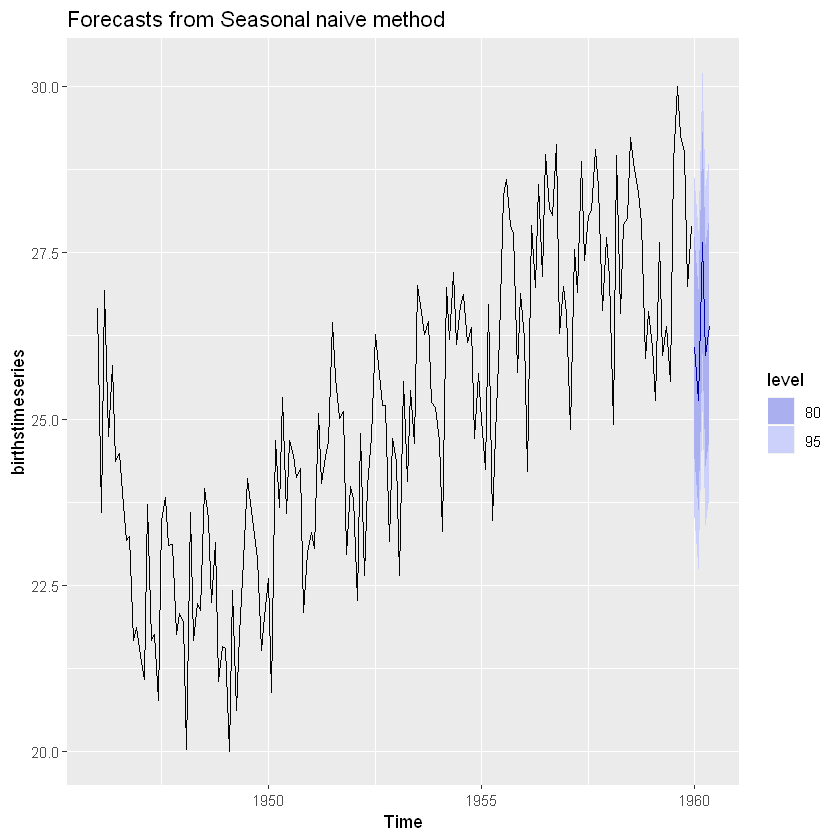

In [72]:
autoplot(snaive(birthstimeseries,5))

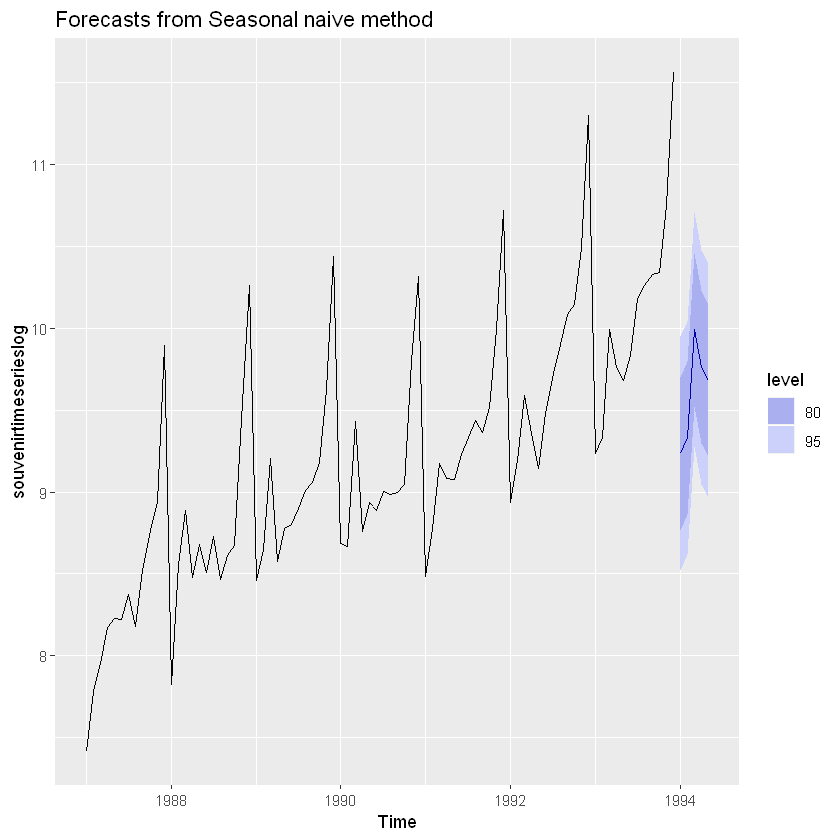

In [73]:
autoplot(snaive(souvenirtimeserieslog,5))

Estimacion drift: last value plus change

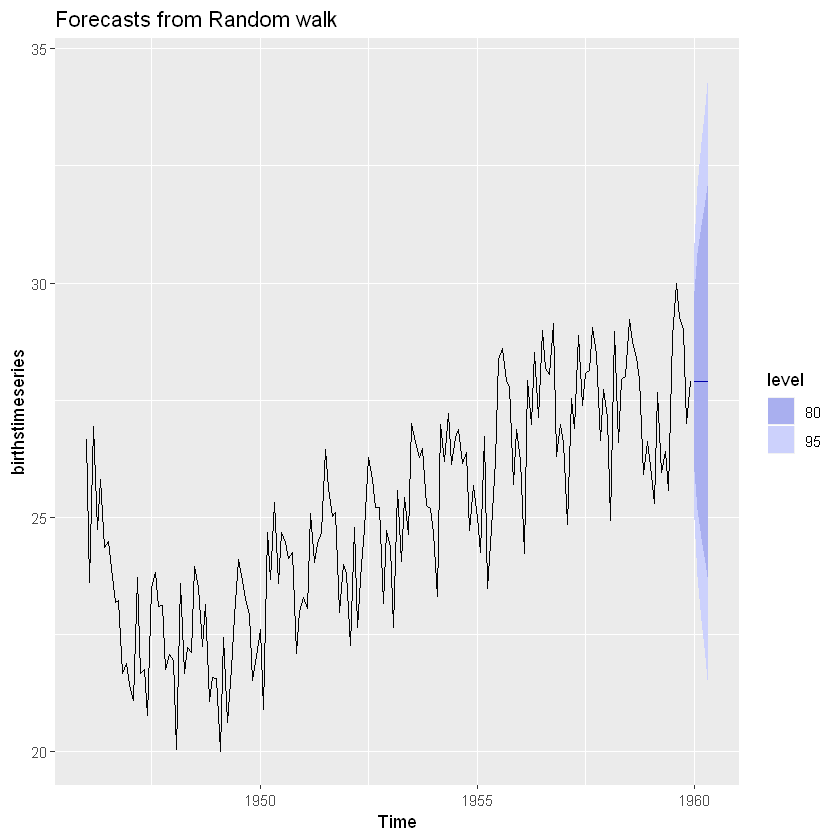

In [75]:
autoplot(rwf(birthstimeseries,5))

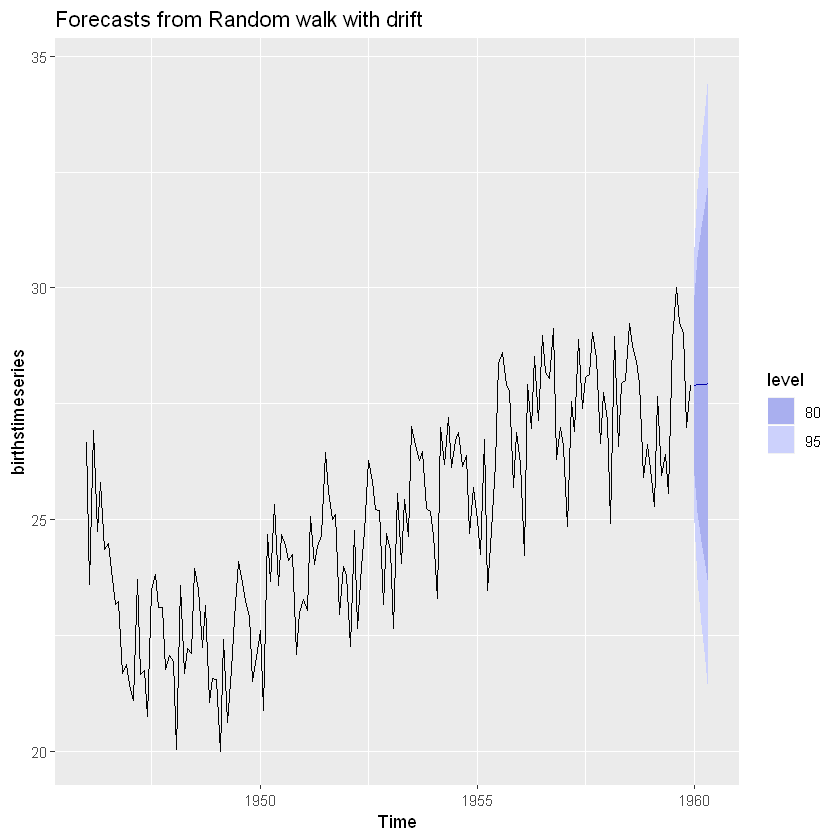

In [76]:
autoplot(rwf(birthstimeseries,drift=T,5))

Estimacion despues de descomponer la serie

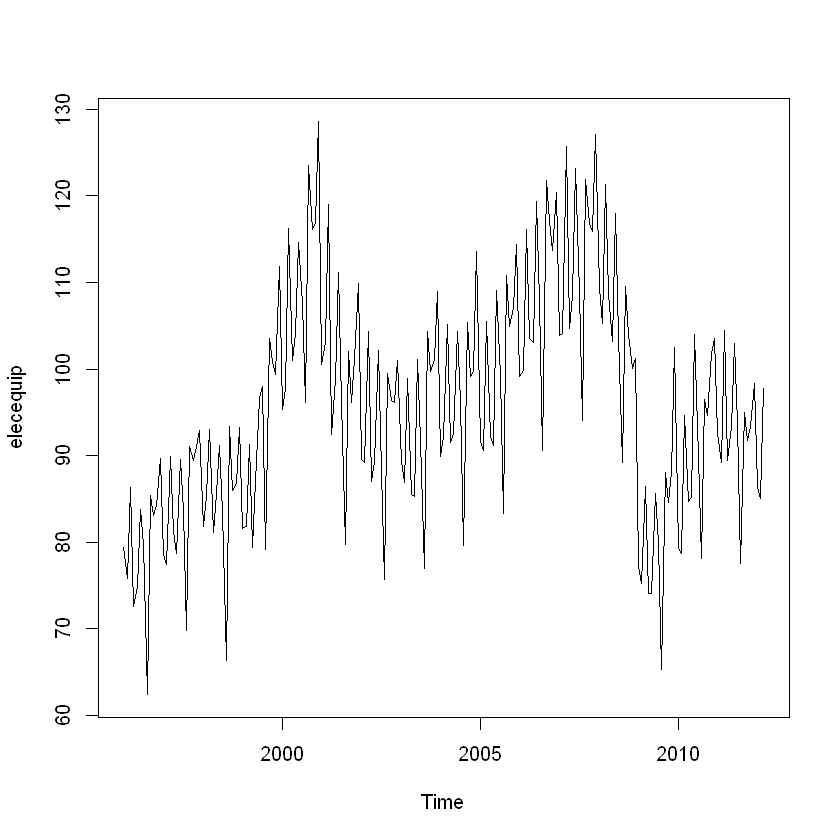

In [81]:
ts.plot(elecequip)

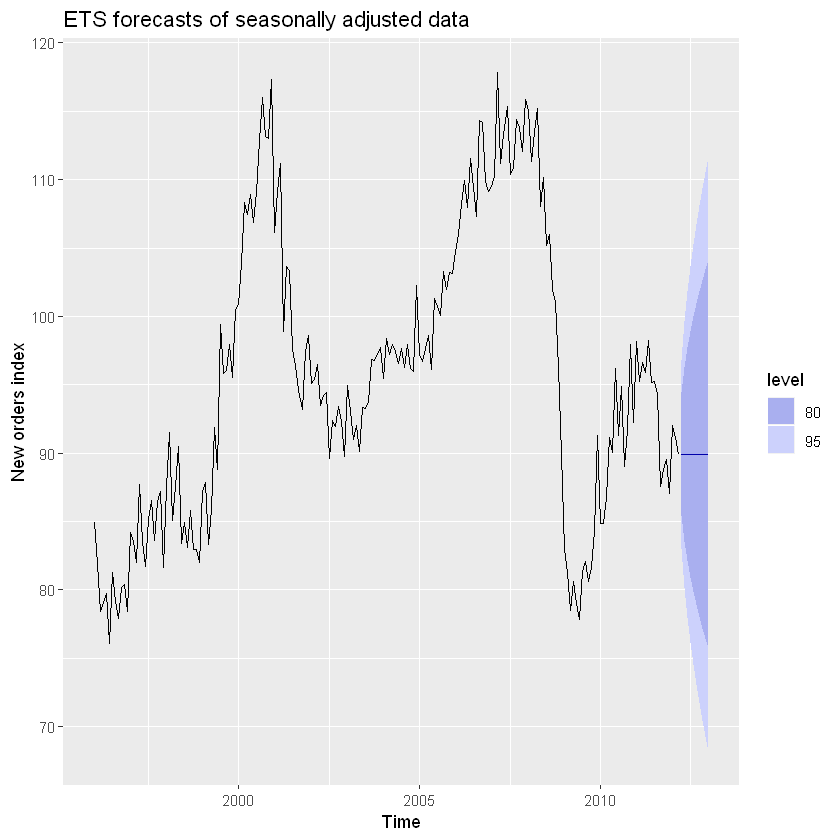

In [77]:
fit <- stl(elecequip, t.window=13, s.window="periodic")
fit %>% seasadj() %>% naive() %>%
  autoplot() + ylab("New orders index") +
  ggtitle("ETS forecasts of seasonally adjusted data")

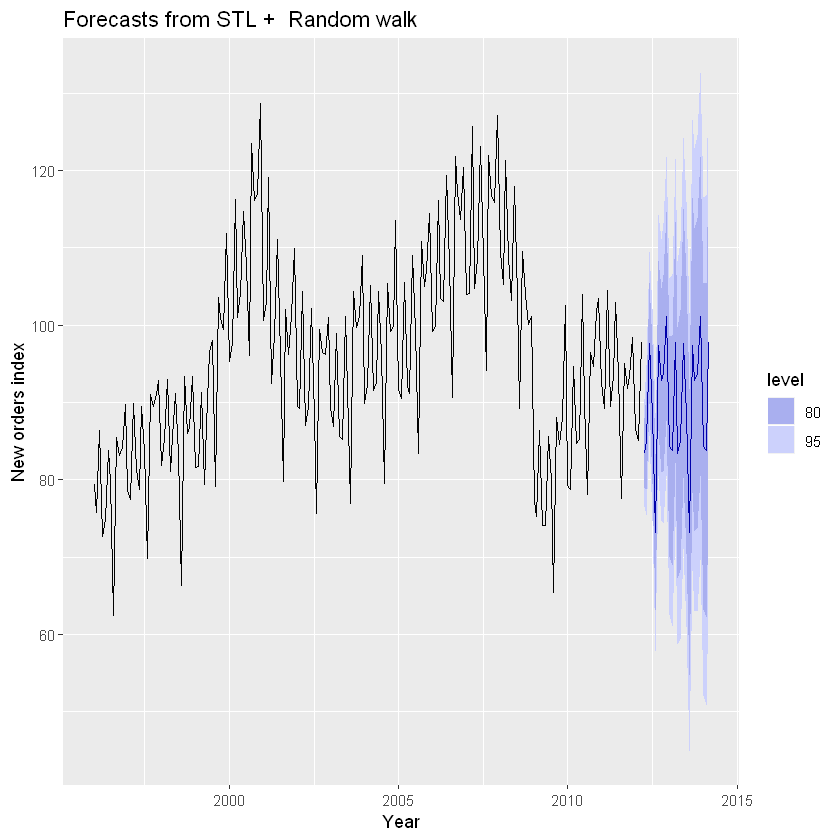

In [80]:
fit %>% forecast(method='naive') %>%
  autoplot() + ylab("New orders index") + xlab("Year")

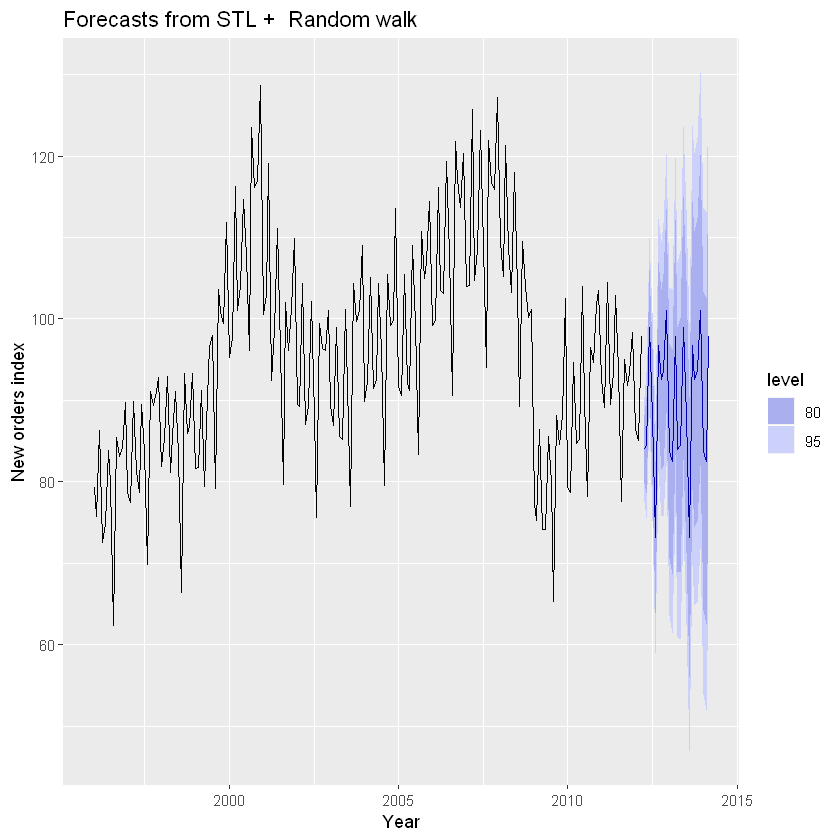

In [82]:
elecequip %>% stlf(method='naive') %>%
  autoplot() + ylab("New orders index") + xlab("Year")

**Estabilizar la varianza**

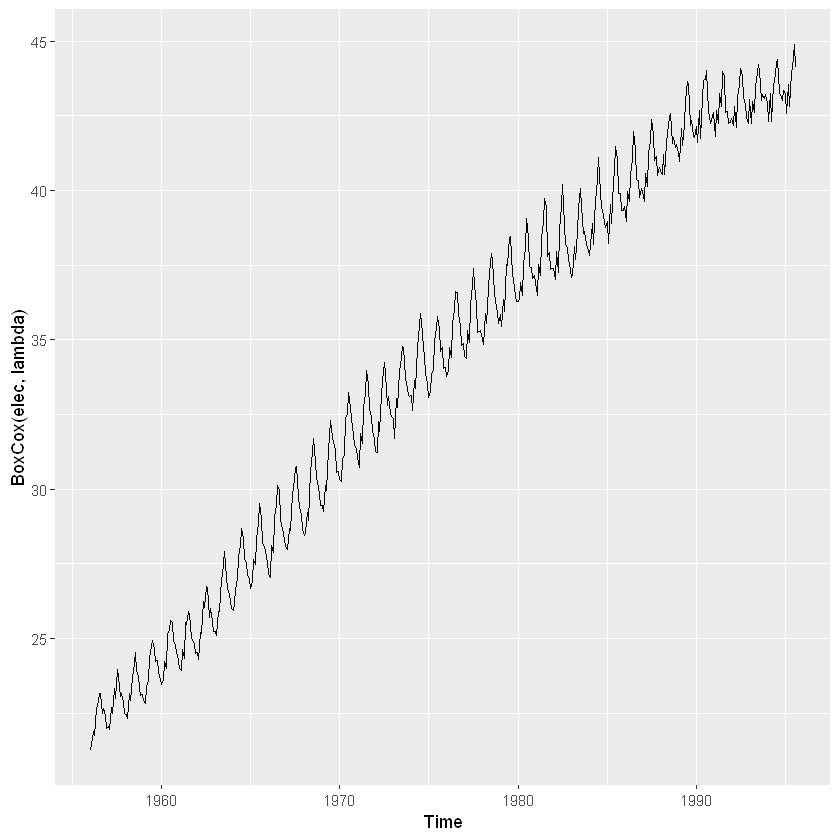

In [84]:
lambda = BoxCox.lambda(elec)
autoplot(BoxCox(elec,lambda))

**Estimacion con lambda**

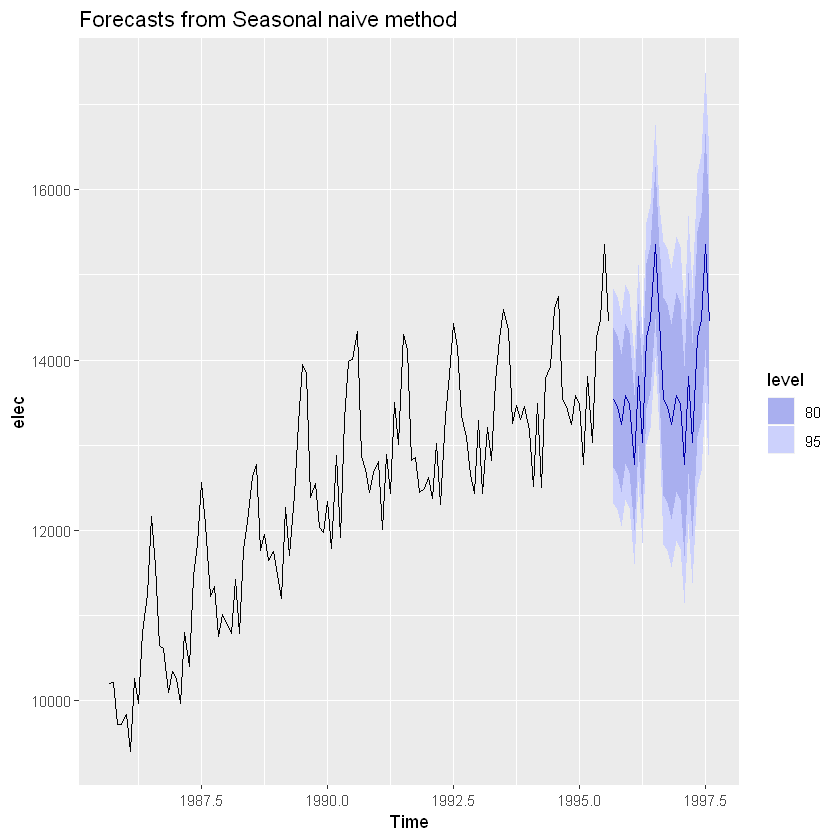

In [85]:
fit<-snaive(elec,lambda=1/3)
autoplot(fit,include=120)

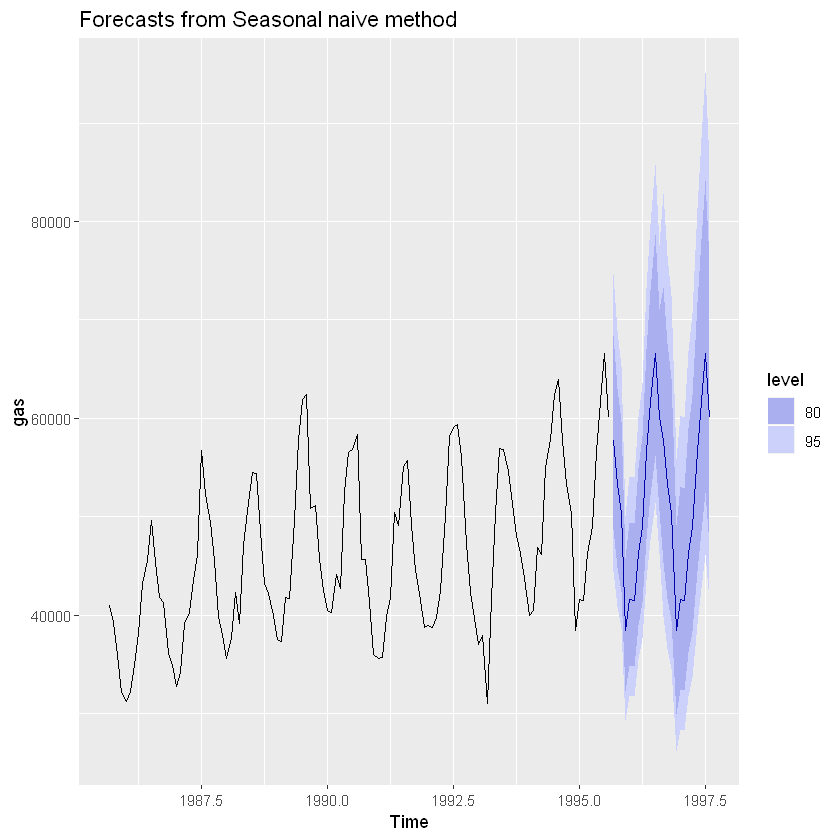

In [86]:
lambda=BoxCox.lambda(gas)
fit<-snaive(gas,lambda=lambda)
autoplot(fit,include=120)

## Residuos sobre las estimaciones

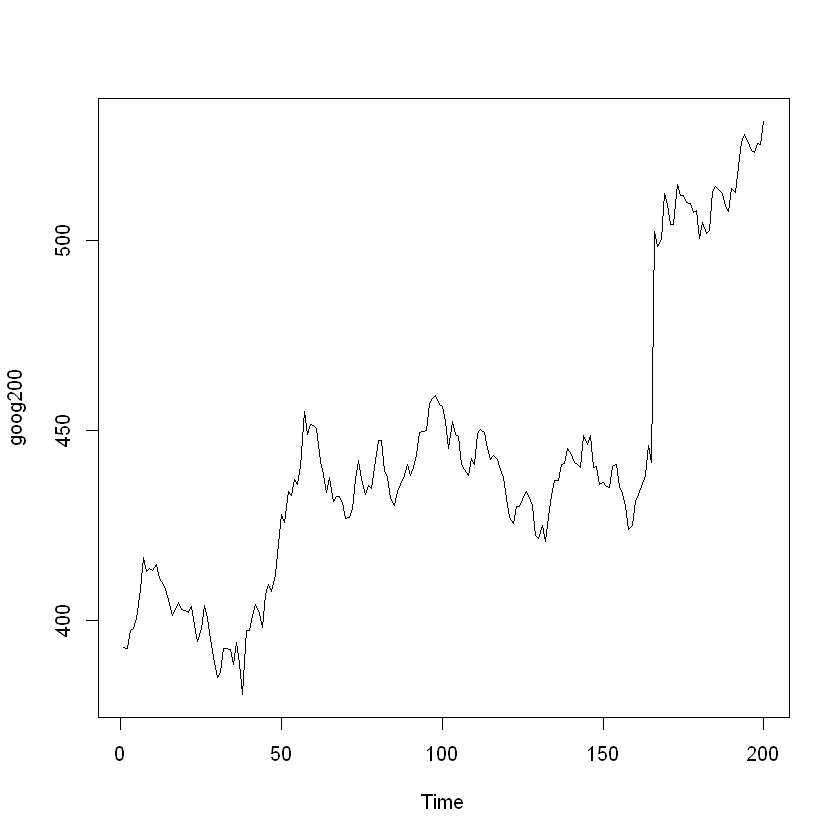

In [87]:
ts.plot(goog200)

In [88]:
res <- residuals(naive(goog200))

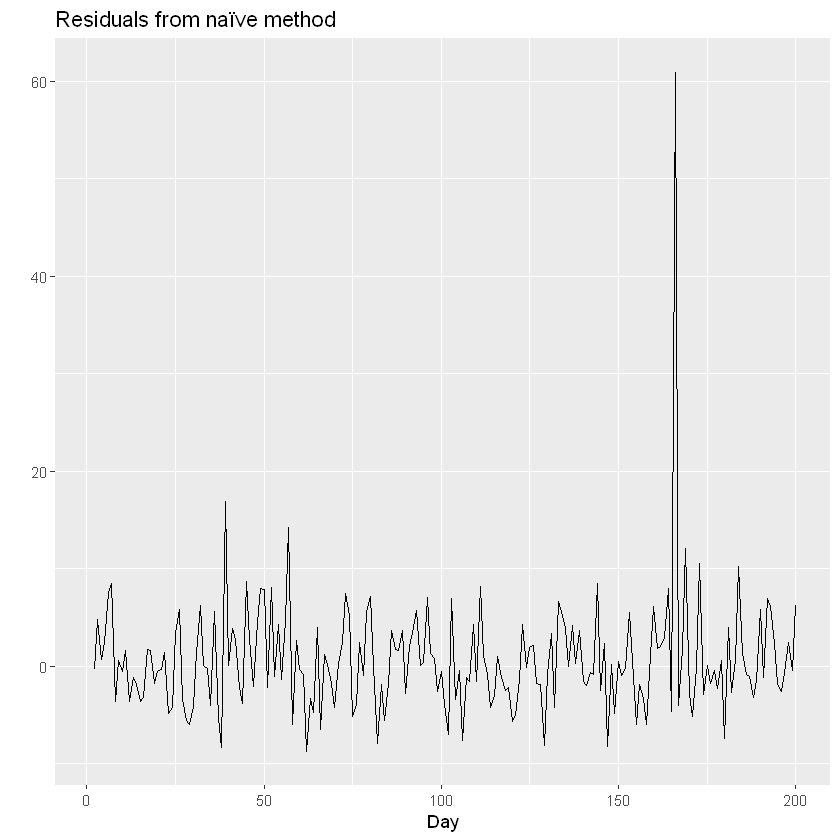

In [89]:
autoplot(res) + xlab("Day") + ylab("") +
  ggtitle("Residuals from naïve method")

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

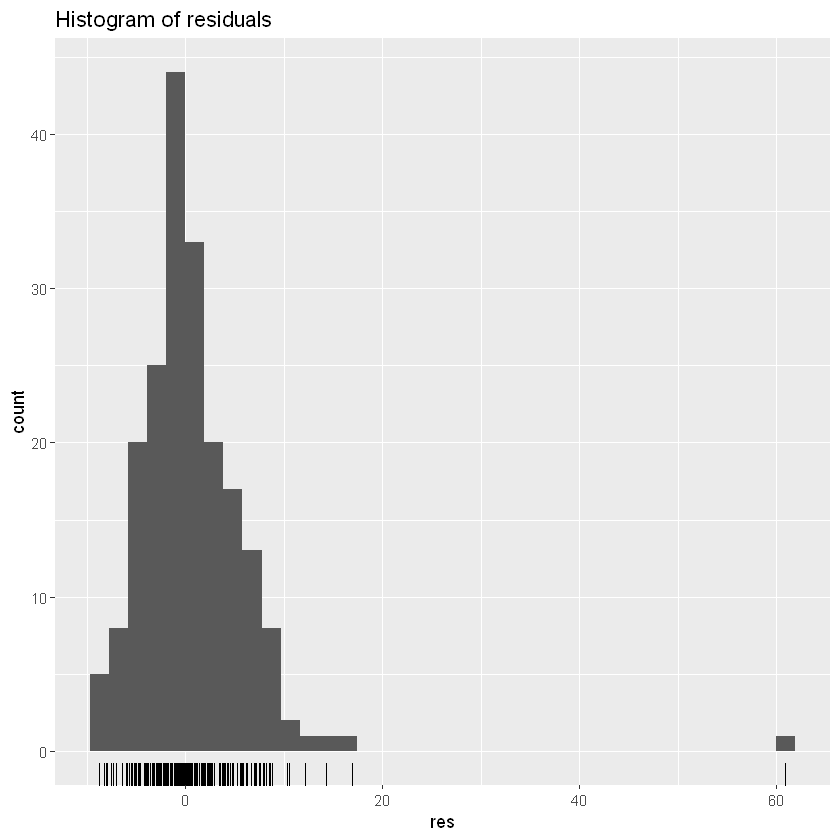

In [90]:
gghistogram(res) + ggtitle("Histogram of residuals")

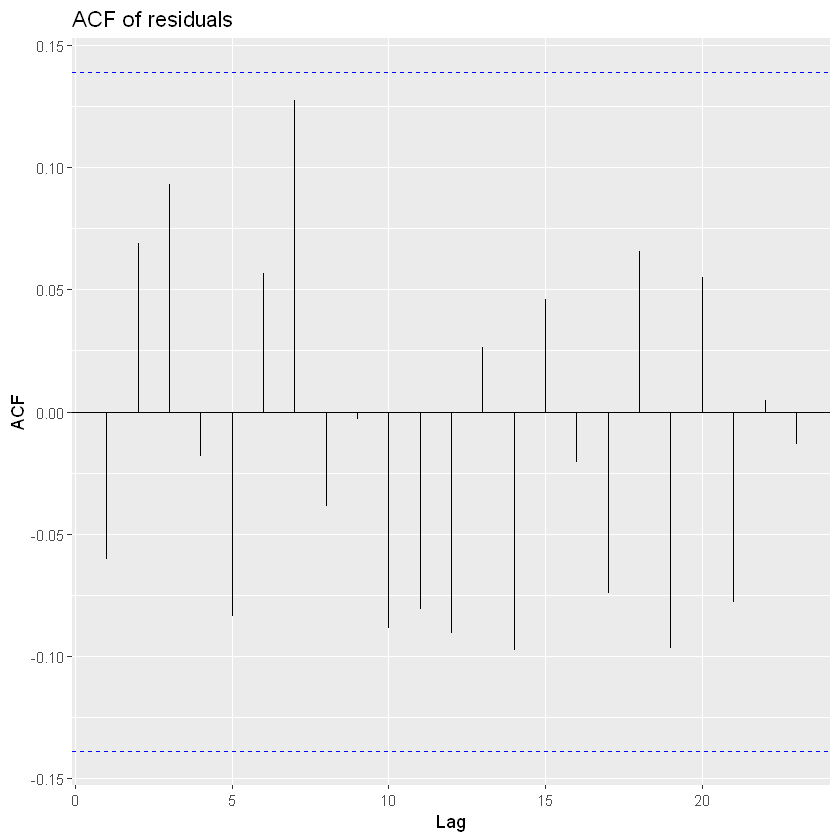

In [91]:
ggAcf(res) + ggtitle("ACF of residuals")


	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



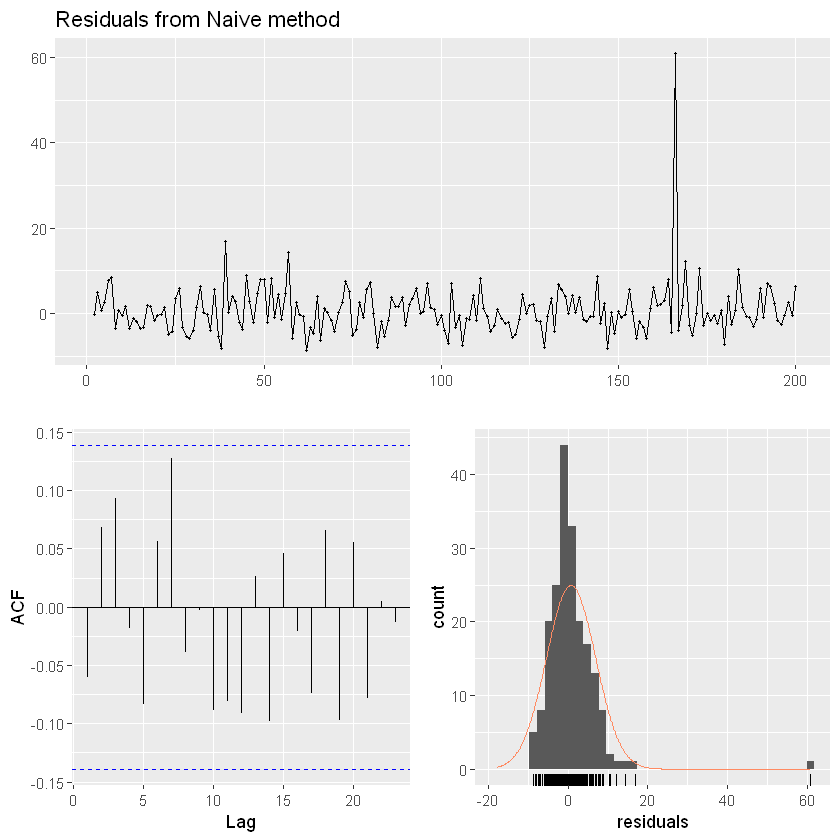

In [92]:
checkresiduals(naive(goog200))

**Test de Residuos**

In [93]:
Box.test(res, lag=10, fitdf=0)


	Box-Pierce test

data:  res
X-squared = 10.611, df = 10, p-value = 0.3886


## Resultados en Test

In [95]:
beer2 <- window(ausbeer, start=1992, end=c(2007,4))
beer3 <- window(ausbeer, start=2008)
beerfit1 <- meanf(beer2, h=10)
beerfit2 <- rwf(beer2, h=10)
beerfit3 <- snaive(beer2, h=10)
accuracy(beerfit1, beer3)
accuracy(beerfit2, beer3)
accuracy(beerfit3, beer3)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.000,43.62858,35.23438,-0.9365102,7.886776,2.463942,-0.10915105,NA
Test set,-13.775,38.44724,34.82500,-3.9698659,8.283390,2.435315,-0.06905715,0.801254


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.4761905,65.31511,54.73016,-0.9162496,12.16415,3.827284,-0.24098292,NA
Test set,-51.4000000,62.69290,57.40000,-12.9549160,14.18442,4.013986,-0.06905715,1.254009


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-2.133333,16.78193,14.3,-0.5537713,3.313685,1.0000000,-0.2876333,NA
Test set,5.200000,14.31084,13.4,1.1475536,3.168503,0.9370629,0.1318407,0.298728


## Modelos AR y MA

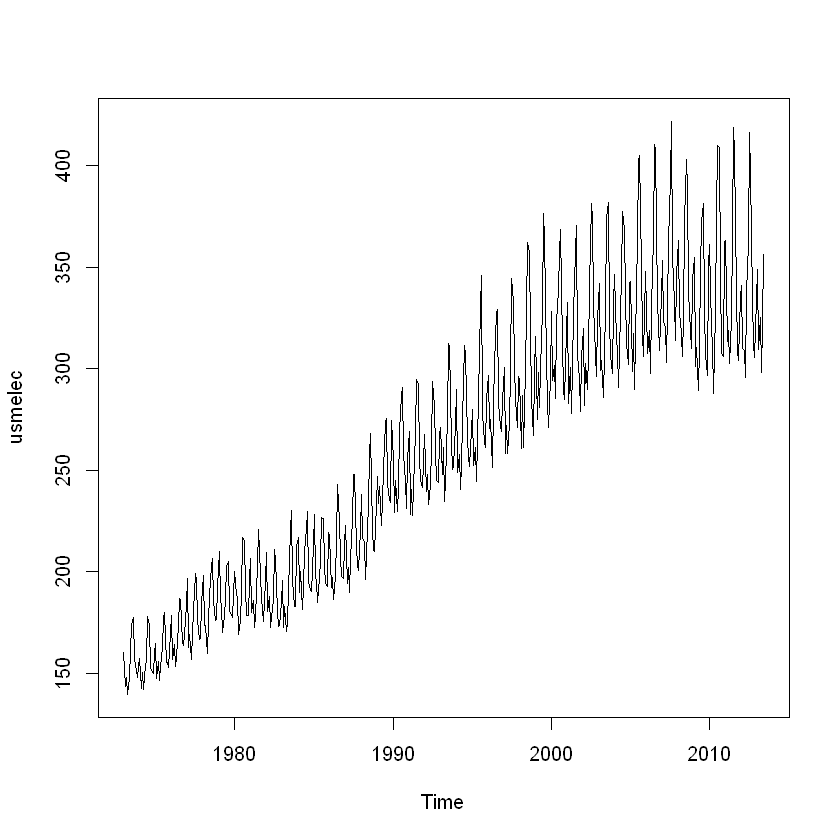

In [96]:
ts.plot(usmelec)

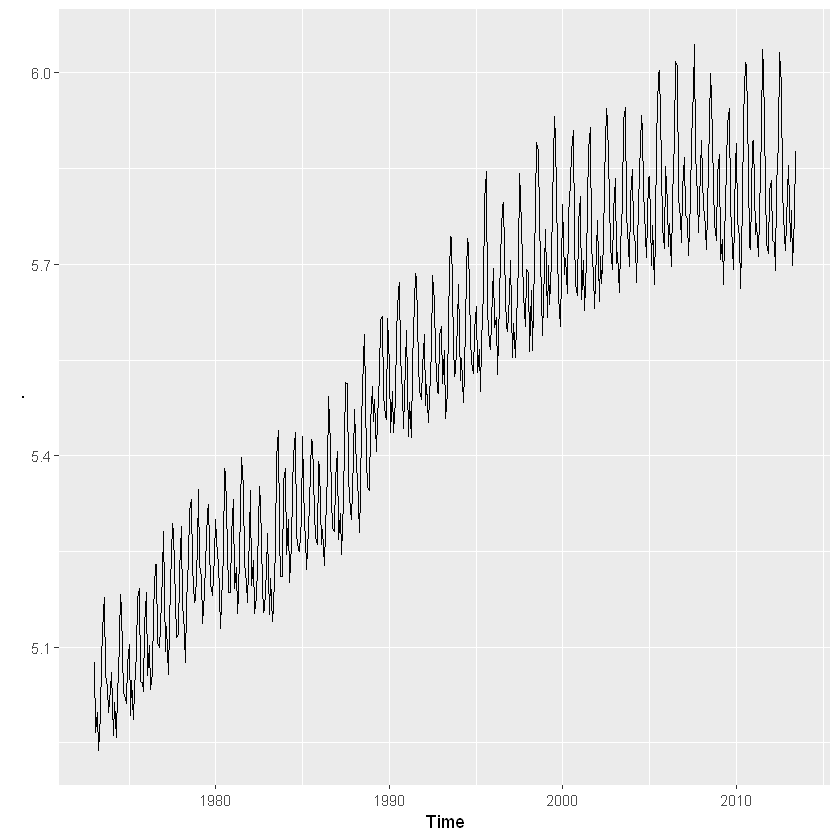

In [97]:
usmelec %>% log() %>% autoplot()

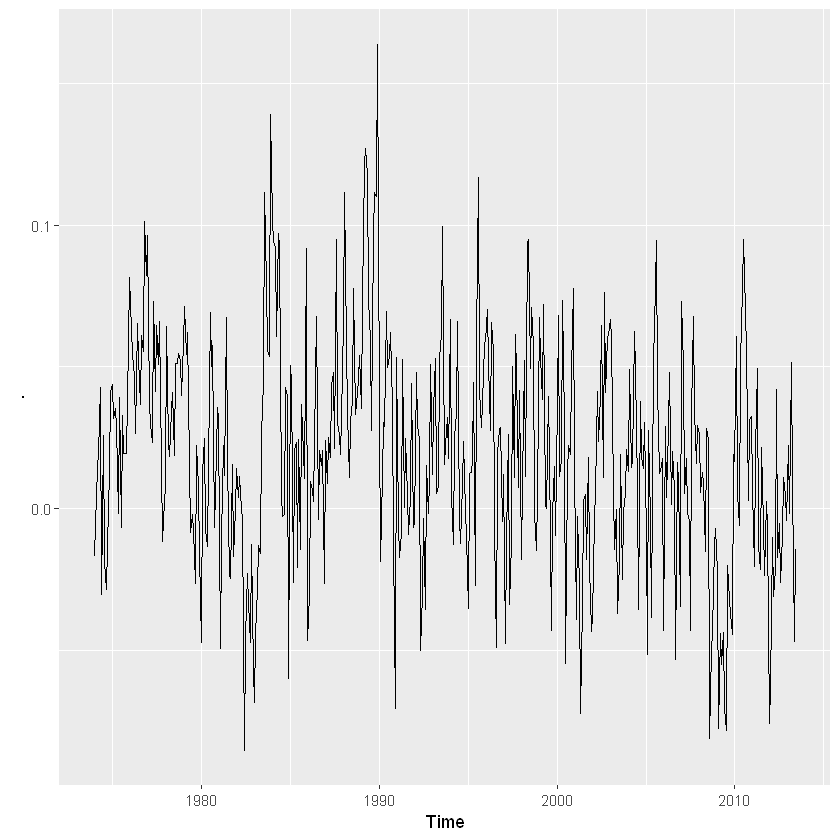

In [98]:
#remove tendency
usmelec %>% log() %>% diff(lag=12) %>% autoplot()

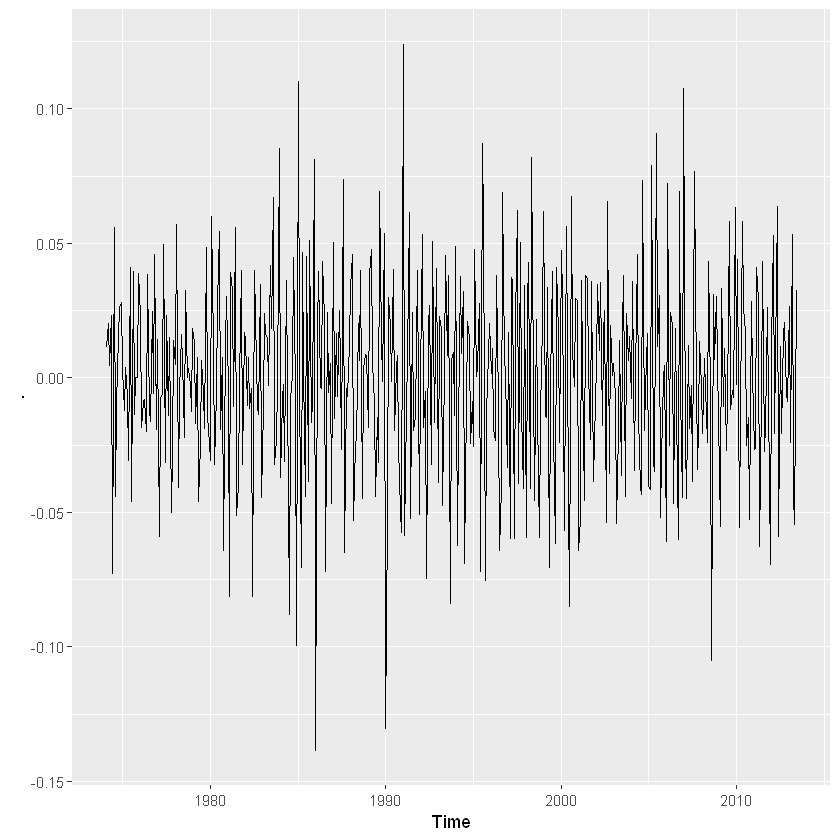

In [99]:
#remove seasonality
usmelec %>% log() %>% diff(lag=12) %>% diff(lag=1) %>% autoplot()

para estimar el número de diferencias requeridas para hacer que una determinada serie de tiempo sea estacionaria. ndiffs estima el número de primeras diferencias necesarias utilizando adf o kpss test

In [100]:
ndiffs(usmelec)

[1] 1

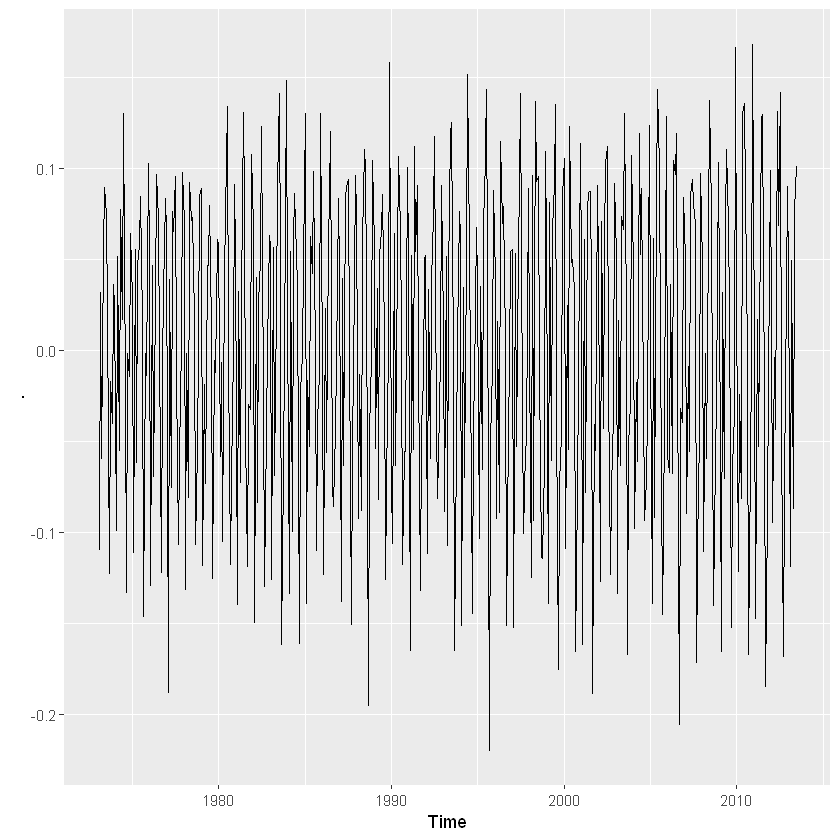

In [101]:
usmelec %>% log() %>% diff(lag=1) %>% autoplot()

## test de estacionariedad

In [116]:
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.5.2"

In [117]:
adf.test(usmelec %>% log() %>% diff(lag=1))

Warning message in adf.test(usmelec %>% log() %>% diff(lag = 1)):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  usmelec %>% log() %>% diff(lag = 1)
Dickey-Fuller = -12.629, Lag order = 7, p-value = 0.01
alternative hypothesis: stationary


## Estimacion por auto.arima

In [105]:
fit <- auto.arima(usmelec)
usmelec_desc <- usmelec %>% log() %>% diff(lag=1)
fit2 <- auto.arima(usmelec_desc)

In [106]:
fit3 <- auto.arima(internet,stepwise = FALSE,approximation = FALSE)

In [107]:
fit

Series: usmelec 
ARIMA(1,0,2)(0,1,1)[12] with drift 

Coefficients:
         ar1      ma1      ma2     sma1   drift
      0.9717  -0.4374  -0.2774  -0.7061  0.3834
s.e.  0.0163   0.0483   0.0493   0.0310  0.0868

sigma^2 estimated as 57.67:  log likelihood=-1635.13
AIC=3282.26   AICc=3282.44   BIC=3307.22

In [108]:
fit2

Series: usmelec_desc 
ARIMA(1,0,1)(2,1,1)[12] with drift 

Coefficients:
         ar1      ma1    sar1     sar2     sma1  drift
      0.4196  -0.8569  0.0119  -0.1014  -0.8257      0
s.e.  0.0619   0.0348  0.0565   0.0531   0.0359      0

sigma^2 estimated as 0.0006822:  log likelihood=1047.85
AIC=-2081.69   AICc=-2081.45   BIC=-2052.58

In [109]:
fit3

Series: internet 
ARIMA(3,1,0) 

Coefficients:
         ar1      ar2     ar3
      1.1513  -0.6612  0.3407
s.e.  0.0950   0.1353  0.0941

sigma^2 estimated as 9.656:  log likelihood=-252
AIC=511.99   AICc=512.42   BIC=522.37


	Ljung-Box test

data:  Residuals from ARIMA(1,0,2)(0,1,1)[12] with drift
Q* = 42.725, df = 19, p-value = 0.001413

Model df: 5.   Total lags used: 24



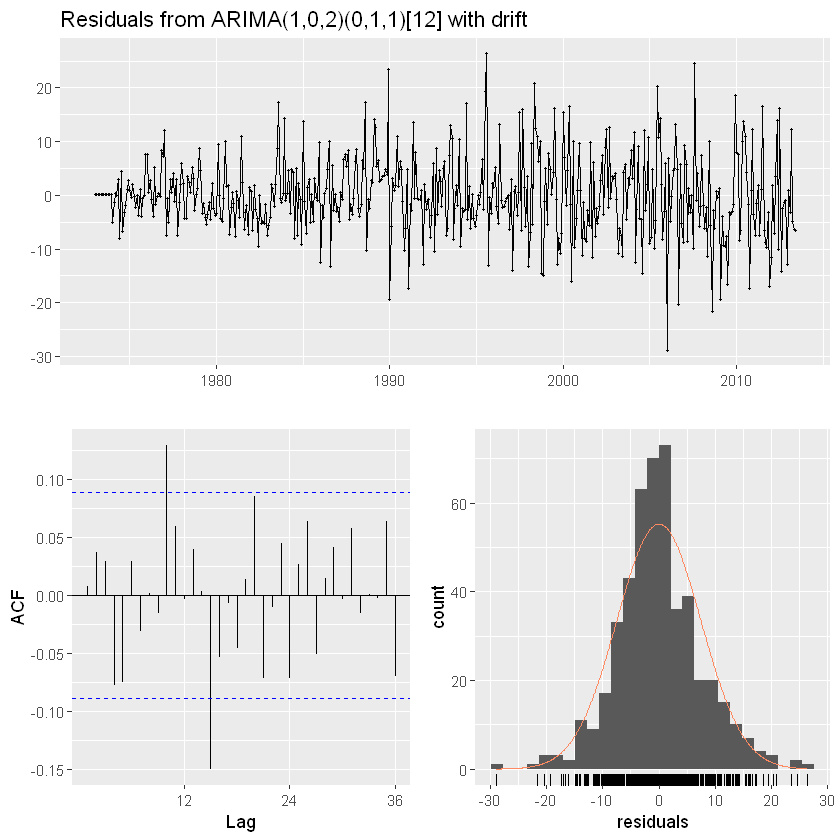

In [110]:
checkresiduals(fit)


	Ljung-Box test

data:  Residuals from ARIMA(1,0,1)(2,1,1)[12] with drift
Q* = 39.21, df = 18, p-value = 0.00267

Model df: 6.   Total lags used: 24



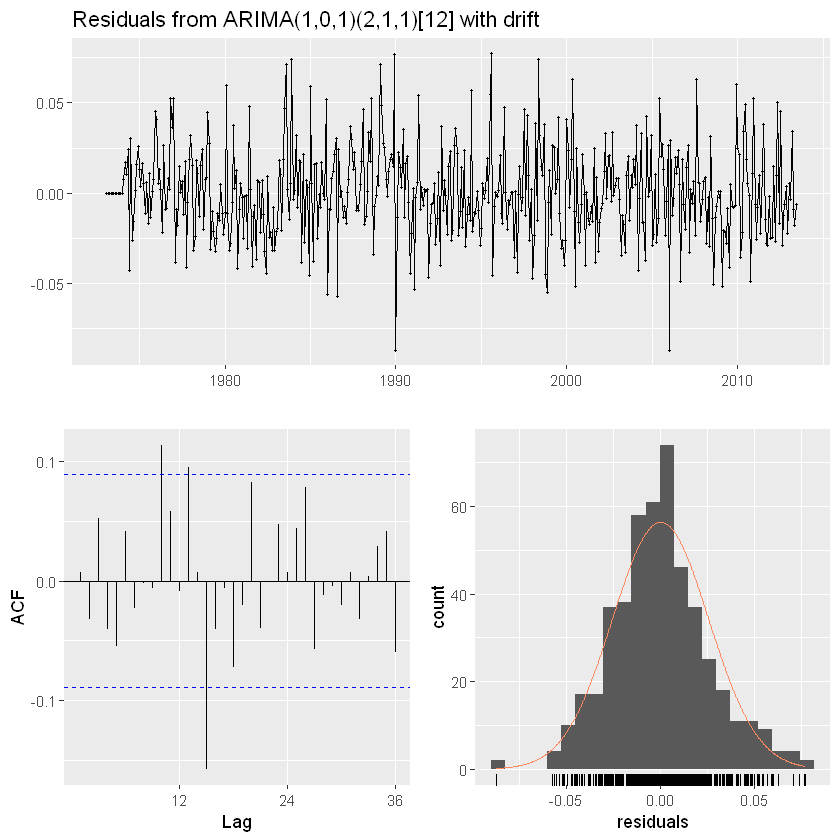

In [111]:
checkresiduals(fit2)


	Ljung-Box test

data:  Residuals from ARIMA(3,1,0)
Q* = 4.4913, df = 7, p-value = 0.7218

Model df: 3.   Total lags used: 10



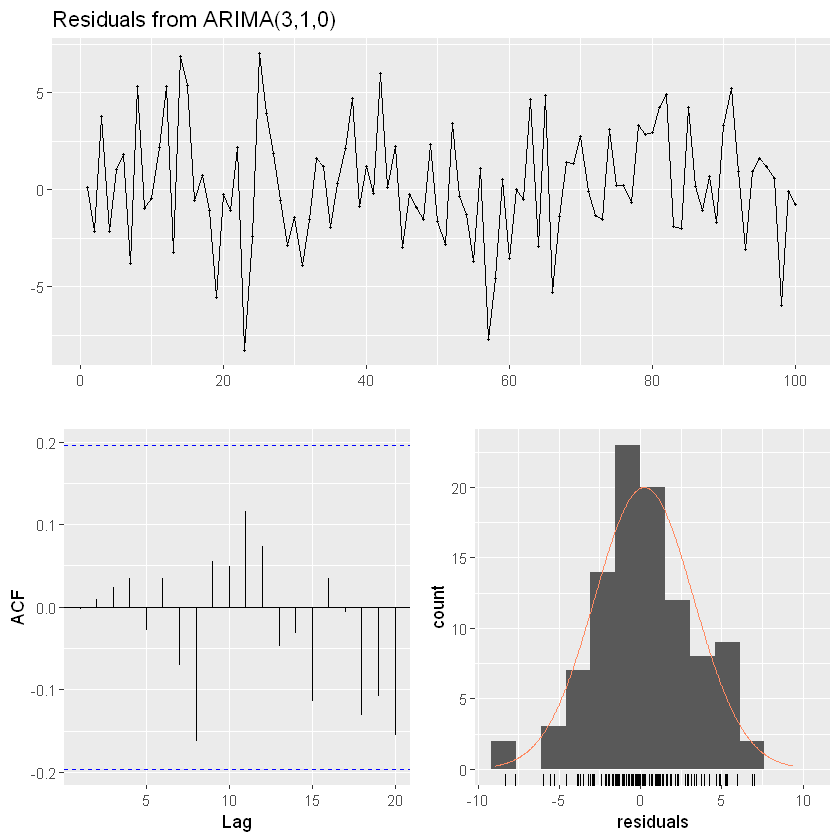

In [112]:
checkresiduals(fit3)

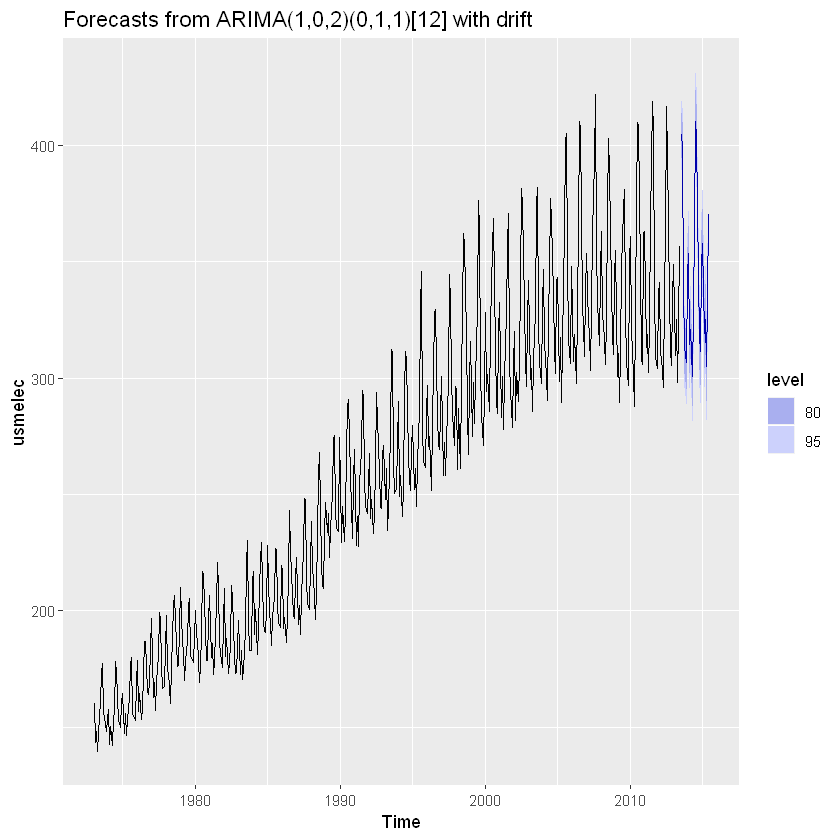

In [113]:
fit %>% forecast %>% autoplot()

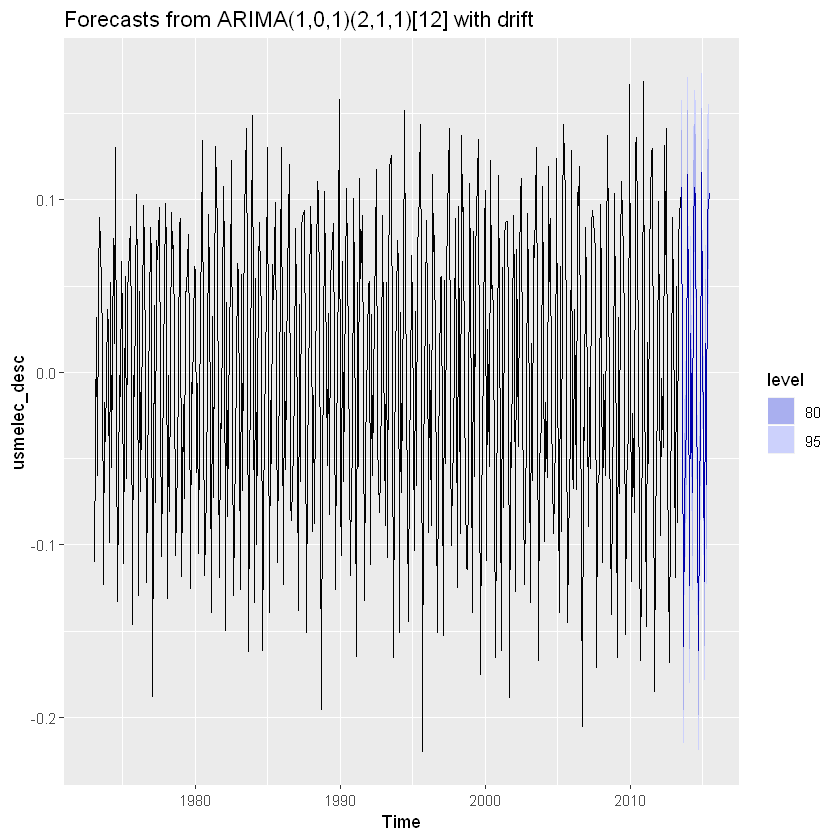

In [114]:
fit2 %>% forecast %>% autoplot()

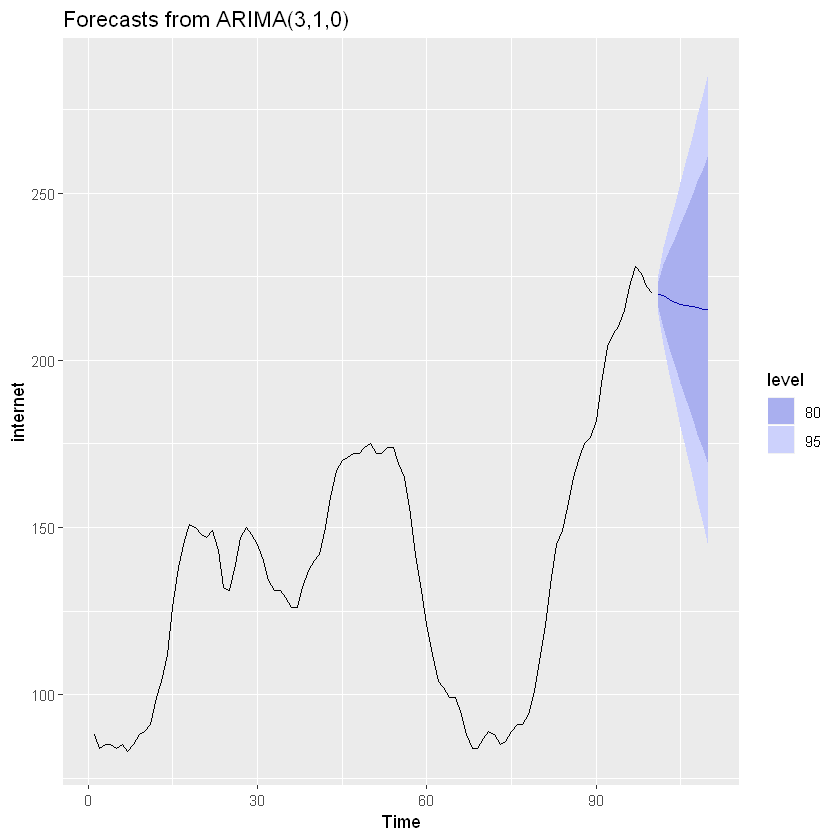

In [115]:
fit3 %>% forecast %>% autoplot()